In [1]:
import numpy as np
import pandas
import pm4py
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import ot
import os
from tqdm import tqdm
import collections
import matplotlib.dates as md
import importlib
import pickle

pandas.set_option('display.max_columns', None)
#pandas.set_option('display.max_rows', None)


import sys
sys.path.append('../../TaskExecutionTimeMining/')
from drbart_parser import *
from event_log_transformer import *

#sys.path.append('../../Evaluation')
sys.path.append('../../Evaluation/')
from PCR_evaluation.drbart_evaluation import *

In [2]:
with open('../transformed_event_logs/PCR_start_end_train.pickle', 'rb') as f:
    test_event_log = pickle.load(f)

test_event_log['time:timestamp'] = test_event_log['time:timestamp_complete']
test_event_log['case:concept:name'] = test_event_log['case:concept:name'].astype(str)

In [3]:
known_activities = list(test_event_log['concept:name'].unique())
print(len(known_activities))

8


In [4]:
known_activities = ['Callback.timeout', 'Export.result', 'Export.to.EMS', 'Match.patient.data', 'Receive.sample.state', 'Send.notification', 'Wait.for.plate.validation', 'timeout']
print(len(known_activities))

8


In [5]:
drbart_model = DRBART(parser_dir = '../../../models/pcr/concept-name_seconds-in-day/',
                     strict_parser=False)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [6]:
sample_drbart = SampleOutcomes_DRBART_PCR_A_S(test_event_log, drbart_model)

11450.02799987793
less than zero
less than zero
less than zero
less than zero
less than zero
[1680532095.9697828, 1680533319.4658852, 1680533497.5238445, 1680533434.7515683, 1680533401.065244, 1680533460.1017318, 1680533199.2529638, 1680548413.020311, 1680536563.595087, 1680532666.2082522, 1680533437.7872064, 1680533339.837625, 1680538899.1823366, 1680533419.9218264, 1680532315.5680337, 1680533390.3372068, 1680533437.2219644, 1680540047.6197057, 1680533311.3296156, 1680533430.7014265, 1680536533.8229644, 1680533560.8748207, 1680533268.0410635, 1680532528.3721137, 1680548632.1051965, 1680539951.9050834, 1680533310.2231762, 1680533295.5563962, 1680533387.6377068, 1680532118.3886998, 1680533390.2846804, 1680535456.6089237, 1680532345.4091935, 1680536716.5643744, 1680548399.4674714, 1680523592.0352268, 1680533305.94256, 1680506131.706458, 1680533308.0311687, 1680533502.222441, 1680533472.302446, 1680532291.8619795, 1680545265.1769426, 1680533282.0715673, 1680533434.998824, 1680533323.51093

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


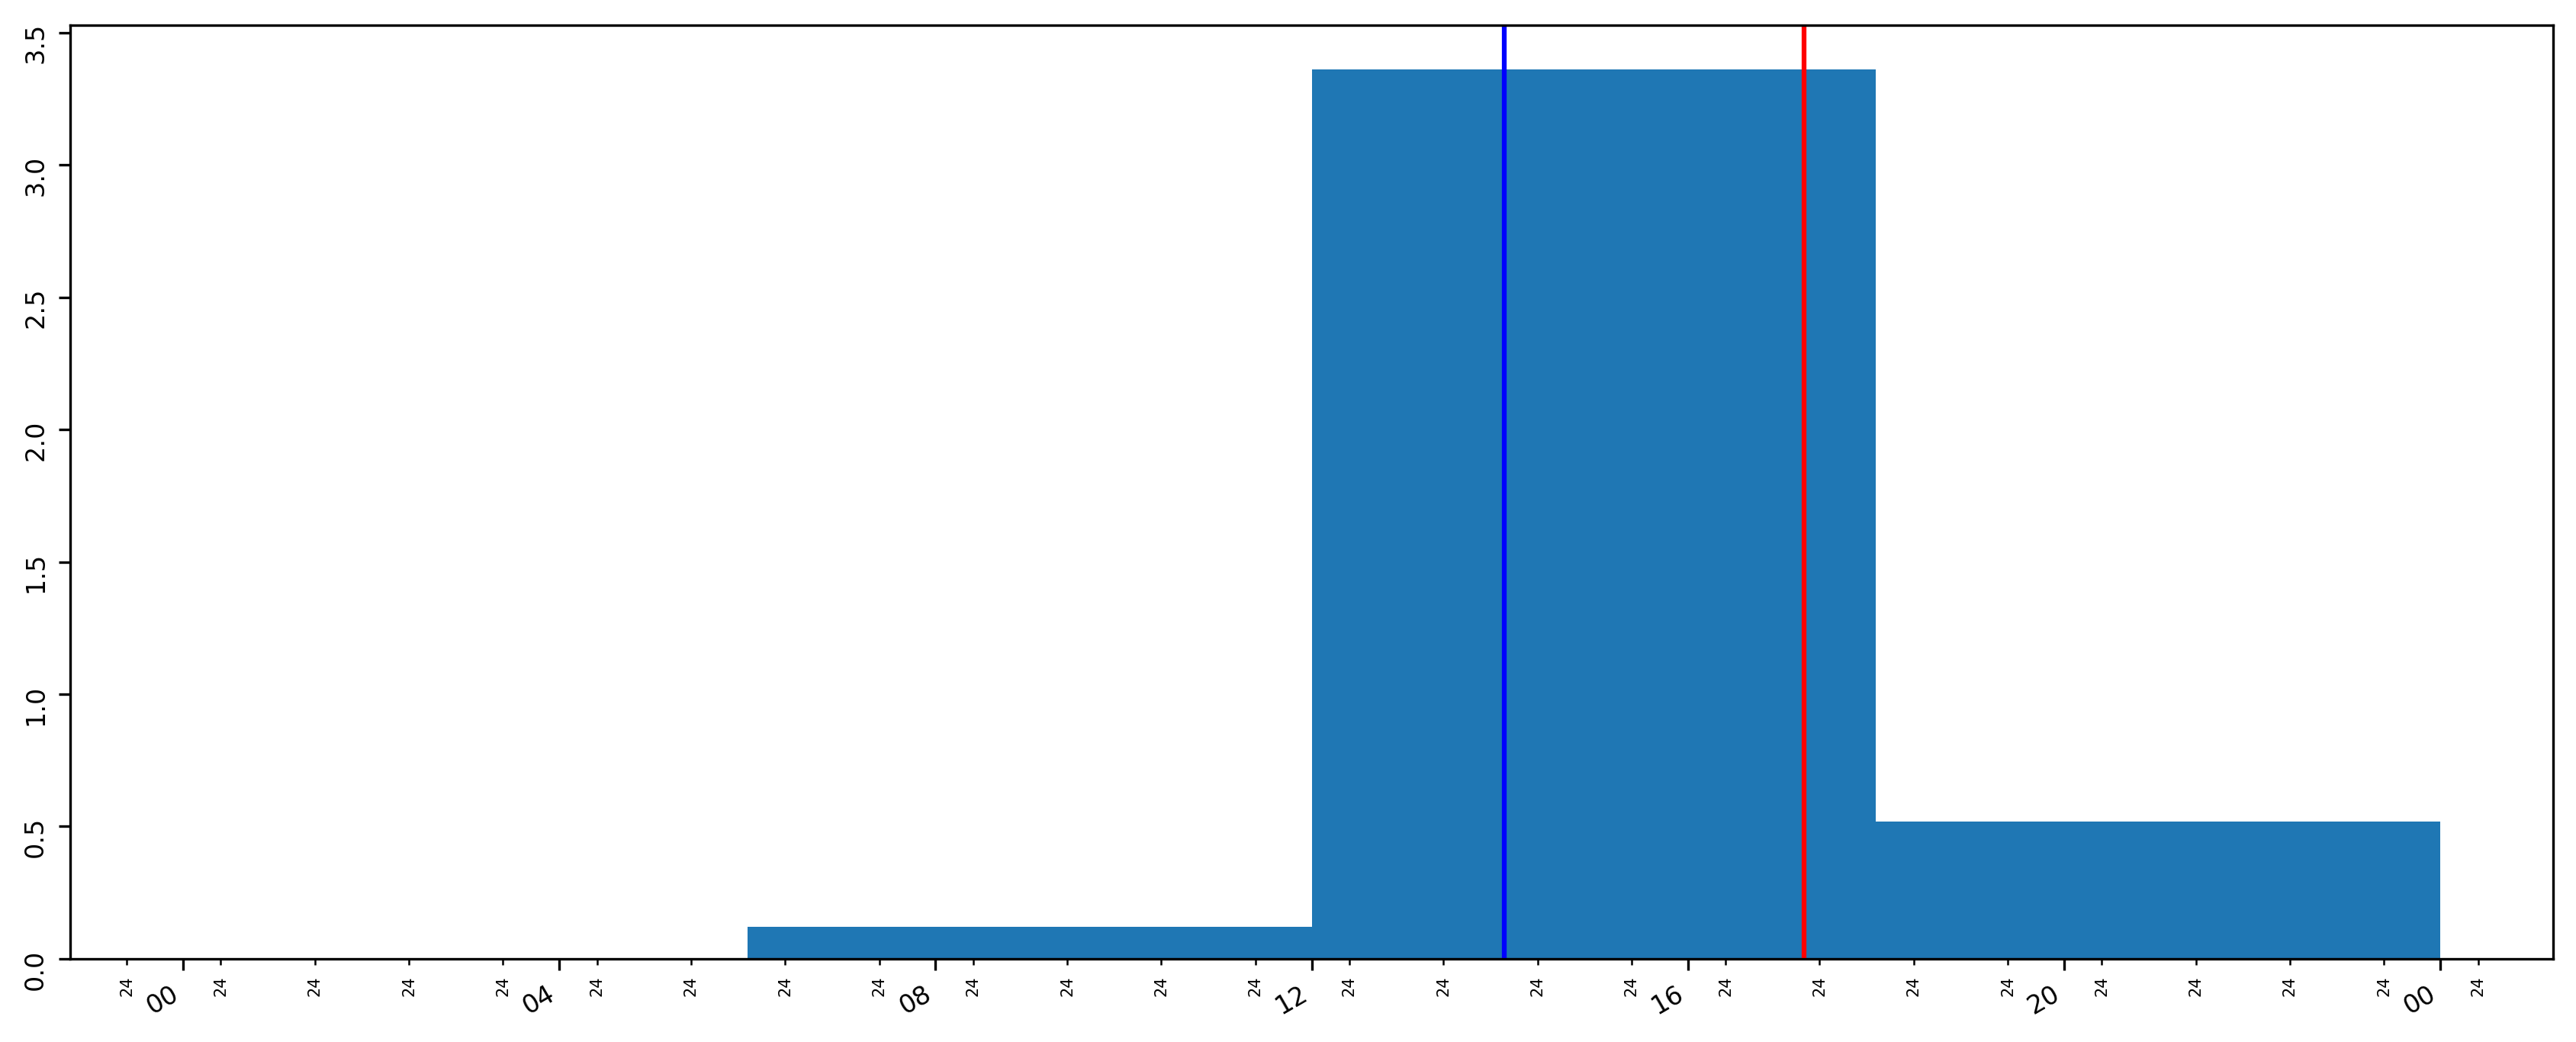

10057 [8.66947207] 0.0 2023-04-03 06:51:18.943601 2023-04-03 21:03:52.105196 14:12:33.161595
11441.0
less than zero
less than zero
[1680535521.26595, 1680534498.963649, 1680548598.0246027, 1680533522.876452, 1680533469.7924001, 1680533145.2422585, 1680564662.1020505, 1680533363.7192037, 1680534617.9955165, 1680533346.2053246, 1680533250.6559622, 1680533414.915635, 1680533158.5242429, 1680534636.538973, 1680533372.42667, 1680532442.398032, 1680533144.0662813, 1680533222.7678003, 1680533316.4339595, 1680532359.4500155, 1680533423.1364741, 1680530528.0267494, 1680538724.8546271, 1680532703.8118587, 1680536759.4072776, 1680538813.089461, 1680533554.0566046, 1680605948.3953853, 1680533091.9370484, 1680529696.423344, 1680535533.1221051, 1680533403.703342, 1680547715.2463489, 1680531909.51359, 1680549676.6747224, 1680539720.260677, 1680532656.6802335, 1680533399.1237068, 1680532806.4038732, 1680534628.6879008, 1680533363.3665984, 1680530531.8473346, 1680533277.298371, 1680532470.8164406, 1680

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


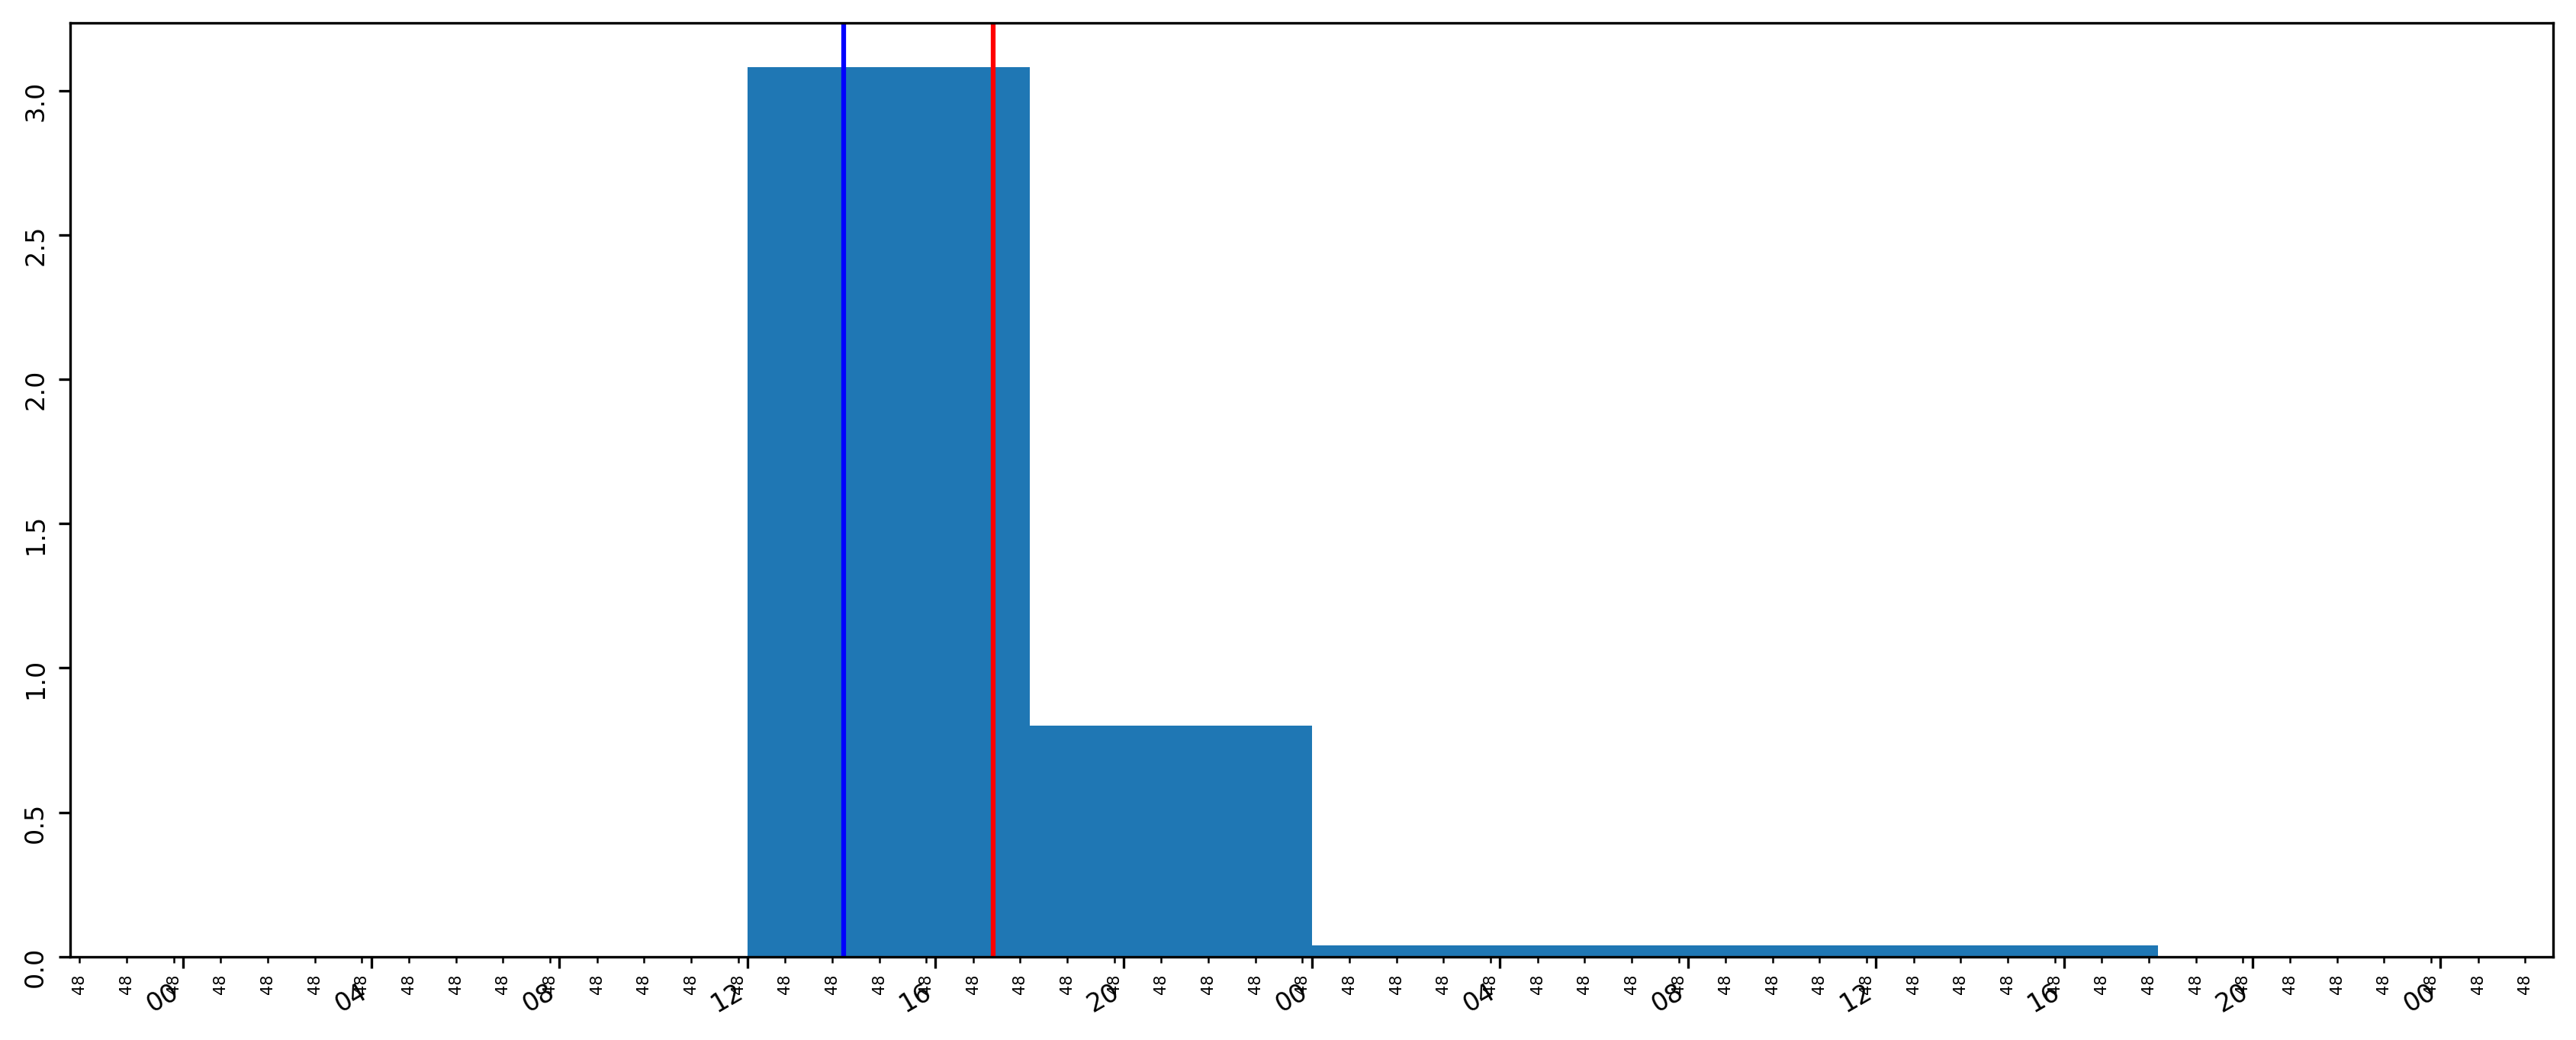

10058 [6.18563169] 0.0 2023-04-03 15:48:16.423344 2023-04-04 12:59:08.395385 21:10:51.972041
11429.72200012207
less than zero
less than zero
[1680532749.935753, 1680532451.9741046, 1680533591.9349952, 1680533845.74137, 1680531977.4323661, 1680533306.6856363, 1680533387.5898993, 1680533515.4858093, 1680548439.2417457, 1680532409.3321033, 1680533405.2414544, 1680536772.3657565, 1680548439.8859465, 1680532332.8299944, 1680534603.928186, 1680541344.3456922, 1680533365.2490284, 1680533365.4204514, 1680531892.1079383, 1680536608.5415516, 1680533387.1948605, 1680539588.4759698, 1680533146.2274344, 1680533370.767984, 1680533109.3769257, 1680532603.5859497, 1680533470.3793538, 1680535616.4837005, 1680533397.039525, 1680541378.8550758, 1680533350.4830308, 1680533414.4459143, 1680533317.3857334, 1680533521.4870245, 1680533032.461732, 1680530633.666286, 1680532471.0250595, 1680535954.915351, 1680577487.8182383, 1680547606.7282476, 1680548638.7746074, 1680533420.9750319, 1680541301.984971, 16805388

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


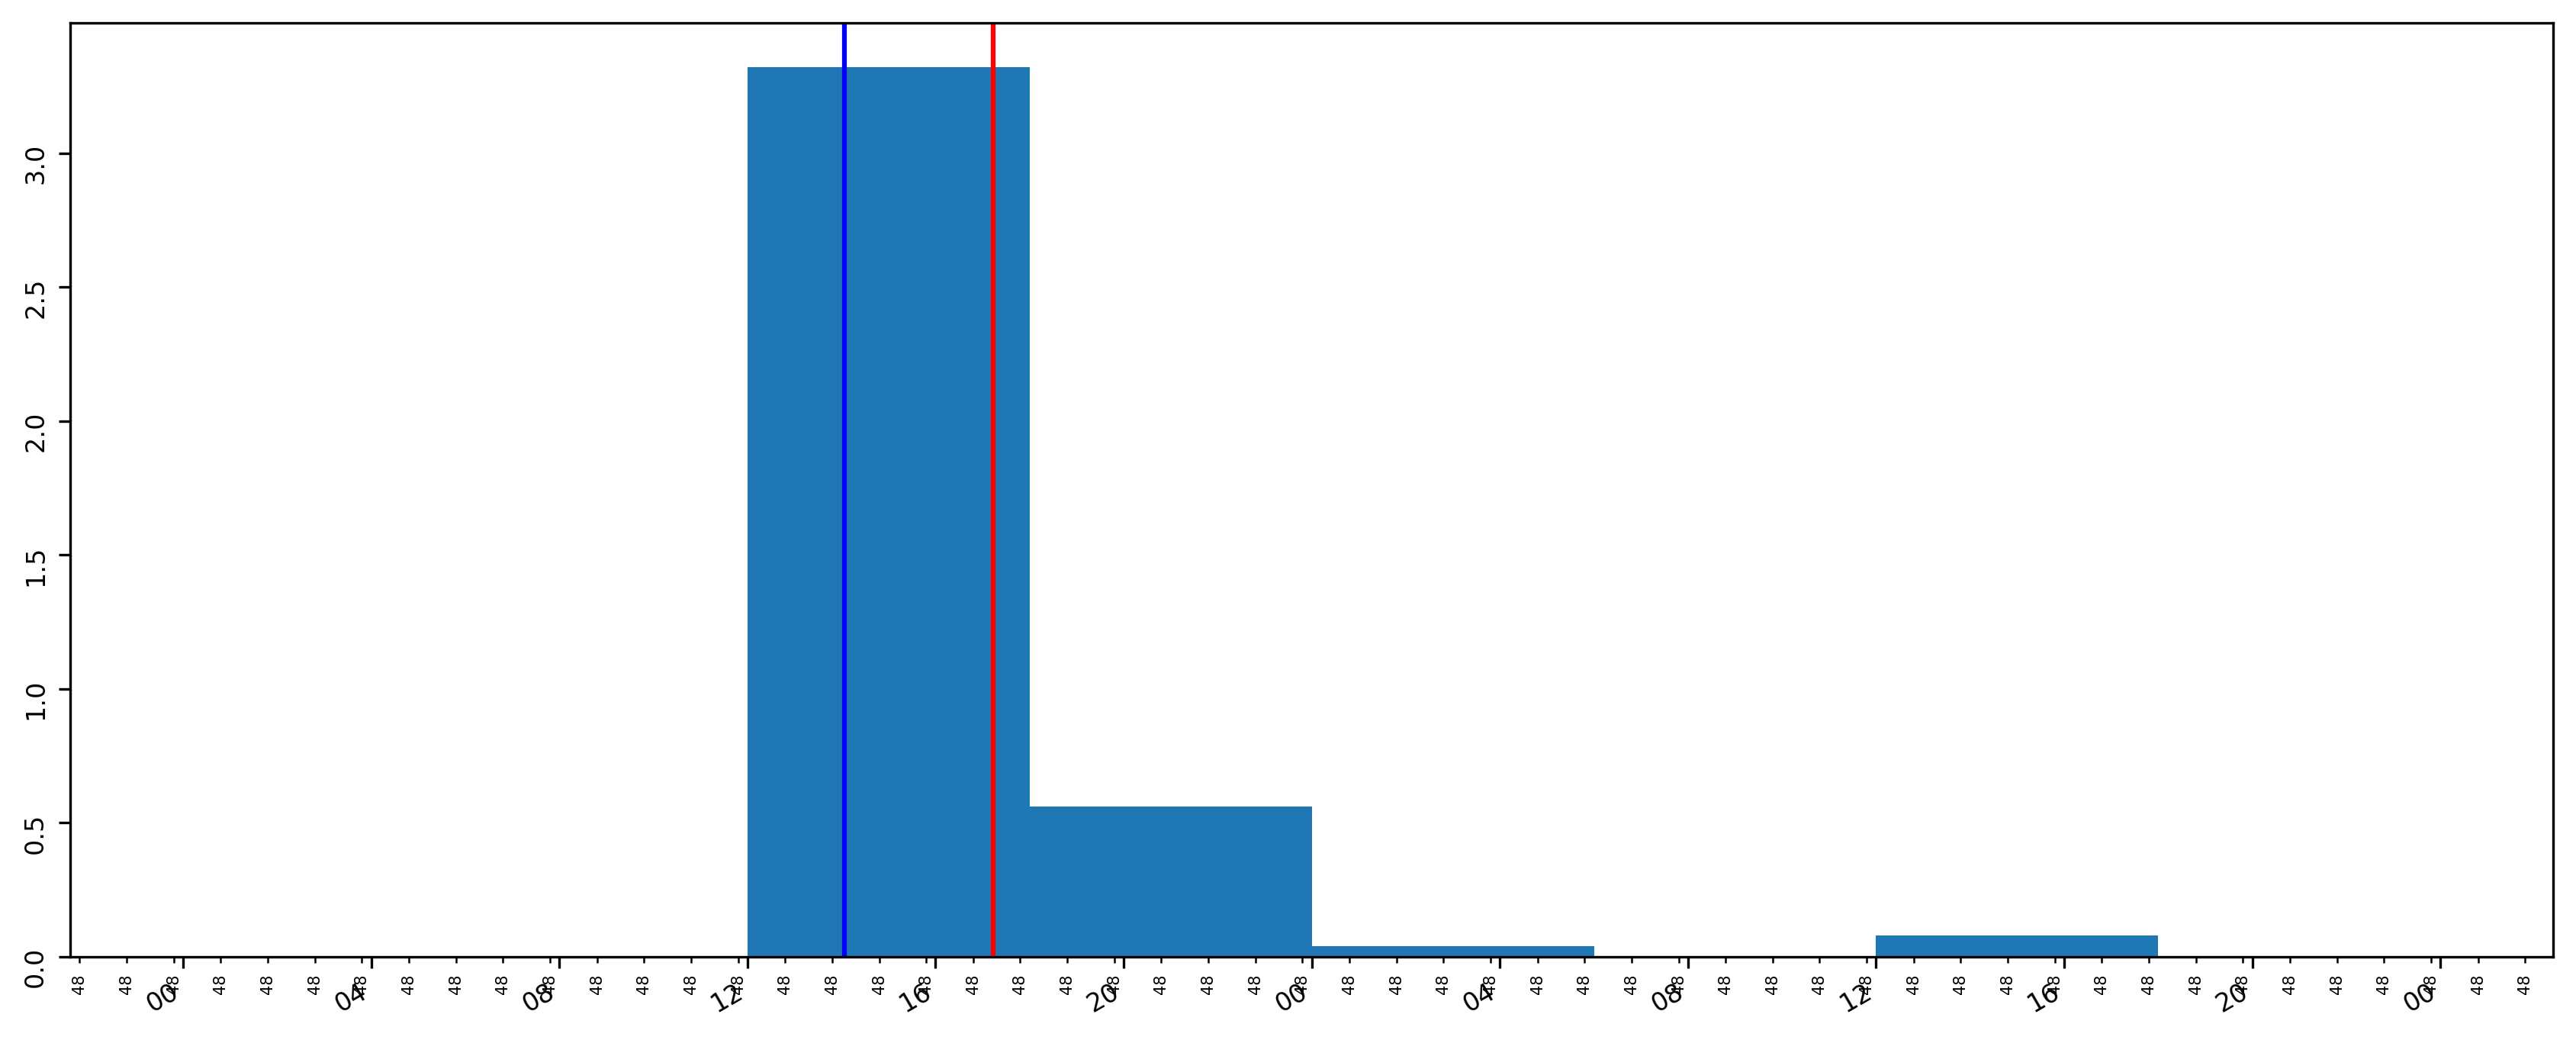

10059 [6.06954908] 0.0 2023-04-03 12:21:13.753826 2023-04-04 12:59:17.102698 1 day, 0:38:03.348872
11424.81299996376
less than zero
[1680533471.3670921, 1680532744.4931304, 1680533128.542211, 1680533449.2407496, 1680536695.408854, 1680533970.3813672, 1680536648.4683628, 1680533066.1273427, 1680532452.452136, 1680532383.634015, 1680537986.0011742, 1680533444.0637112, 1680533377.8897908, 1680542814.5741599, 1680533474.7847834, 1680533436.3356125, 1680533349.6167023, 1680533406.6580365, 1680533459.004958, 1680533532.55308, 1680533402.763314, 1680533648.3779798, 1680532440.2589188, 1680533566.6297452, 1680532521.3424656, 1680533315.7388651, 1680533806.2683861, 1680539643.9307954, 1680532499.356215, 1680533353.2849798, 1680532421.0048618, 1680533280.0726473, 1680533478.5515444, 1680536701.2342138, 1680533444.947211, 1680532728.398948, 1680539974.7256508, 1680533180.721124, 1680532415.8704083, 1680533320.52767, 1680538664.1766236, 1680536682.4755936, 1680533405.6040704, 1680533312.772037, 16

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


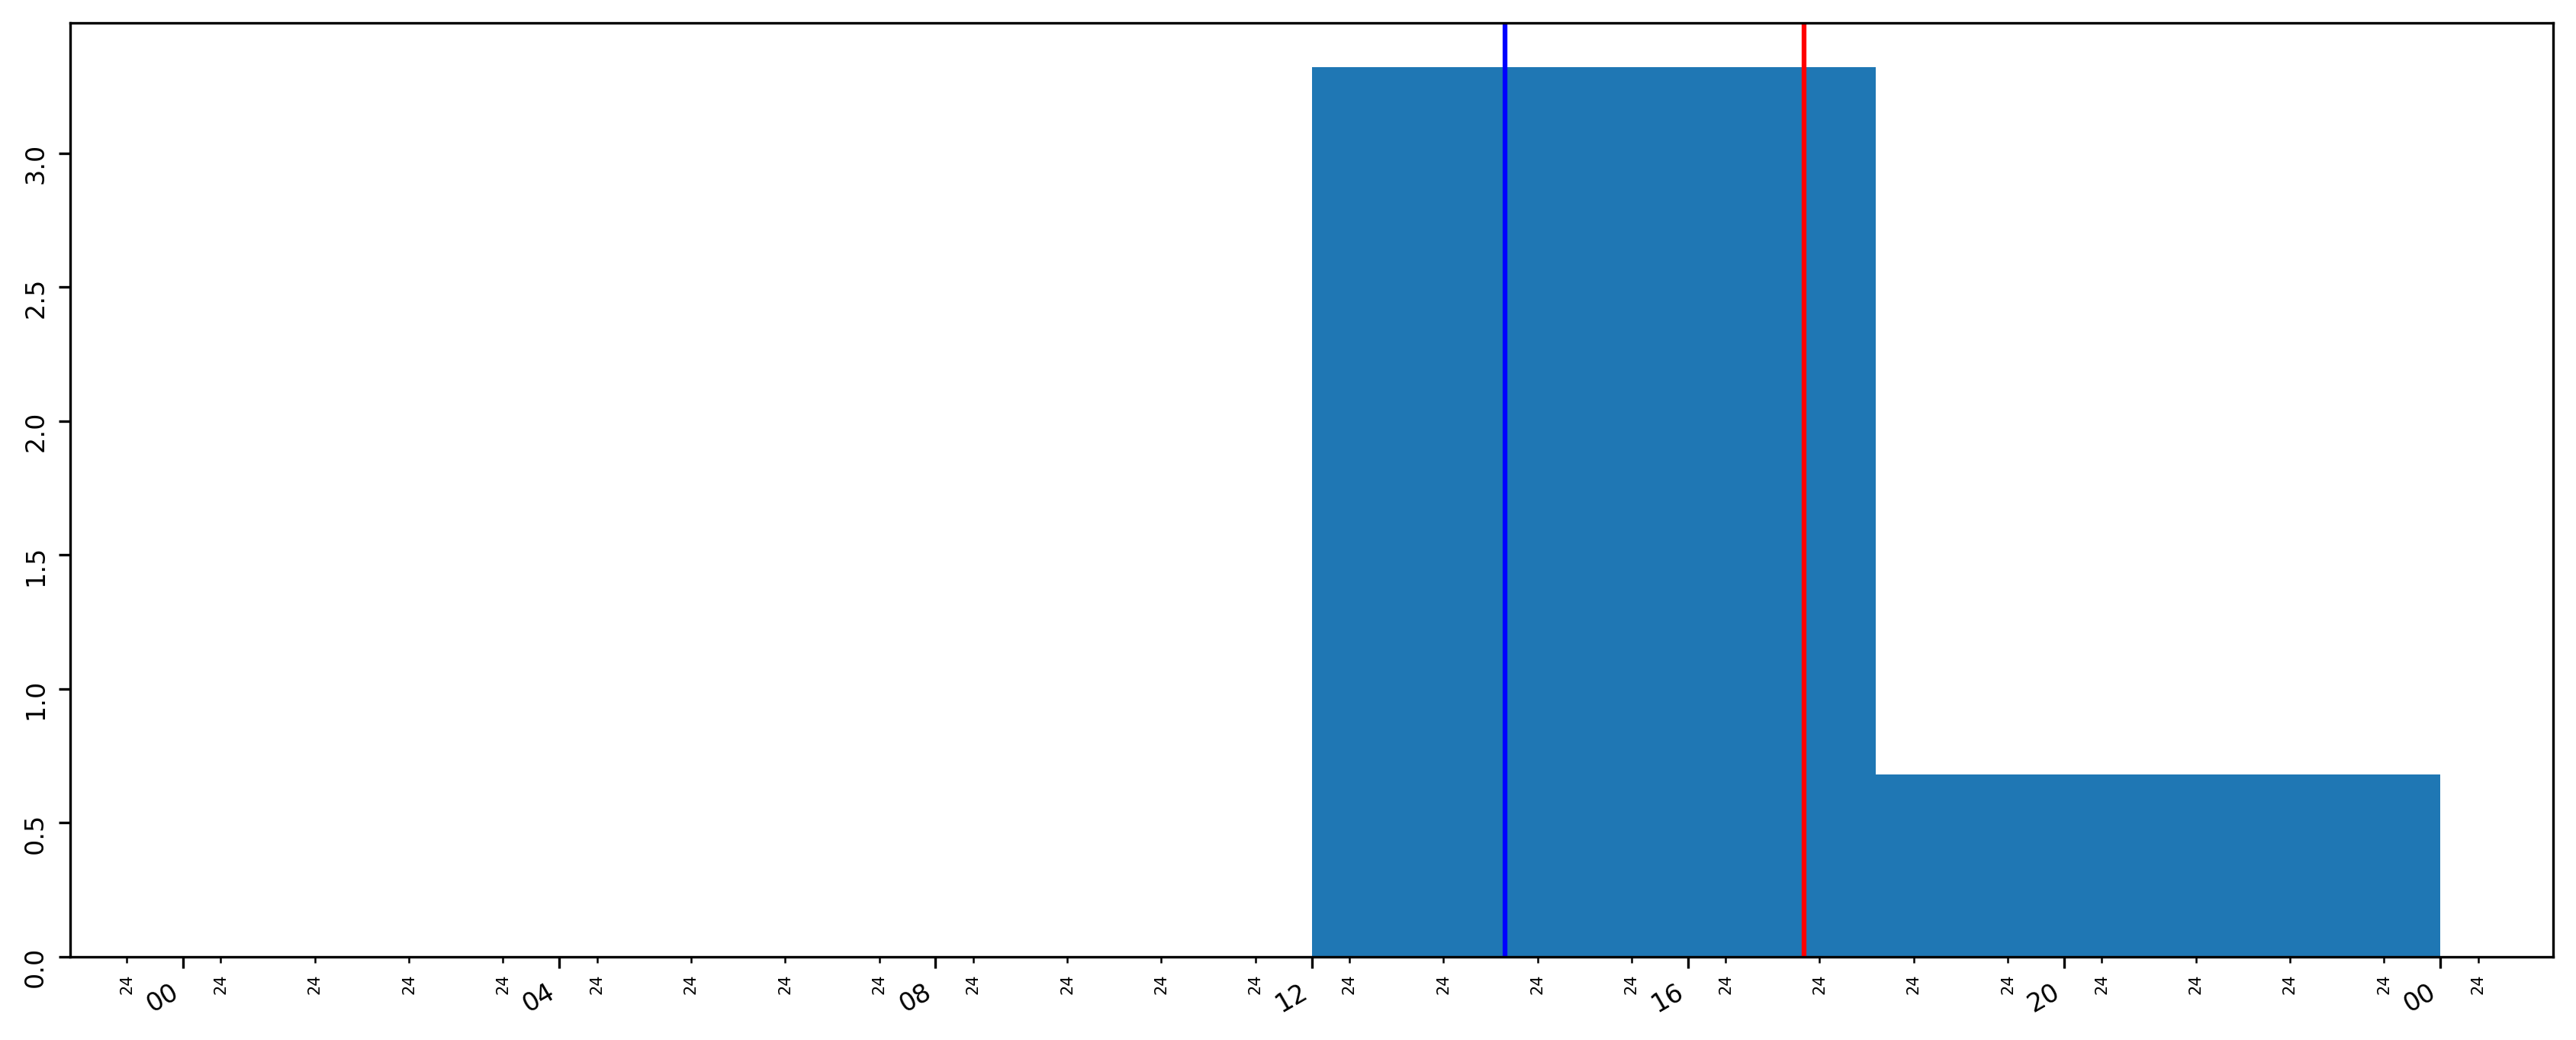

10060 [9.93671212] 0.0 2023-04-03 16:02:03.651261 2023-04-03 21:04:00.576288 5:01:56.925027
11416.5609998703
less than zero
less than zero
less than zero
[1680532367.0489774, 1680551348.560418, 1680532332.7042944, 1680536956.2266219, 1680533345.9627917, 1680535553.3963668, 1680536725.3387387, 1680532359.6183832, 1680534541.6313324, 1680529643.45348, 1680533432.1221707, 1680533282.5899754, 1680536762.4534163, 1680535555.5078409, 1680534622.3134837, 1680533319.0364556, 1680533333.0318413, 1680535507.3180842, 1680533129.6703544, 1680605985.6492655, 1680544868.4674273, 1680534509.6957529, 1680541359.6744072, 1680542871.6038032, 1680530578.0334182, 1680534539.1179936, 1680533156.1596386, 1680532719.281783, 1680548483.2760334, 1680534728.0093284, 1680533365.9363928, 1680538839.9005082, 1680533379.5464709, 1680532732.013011, 1680533415.9702868, 1680542846.4152596, 1680532433.649658, 1680533153.8577445, 1680548407.6463487, 1680532477.9794056, 1680532425.2367918, 1680533083.6294322, 1680533345.

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


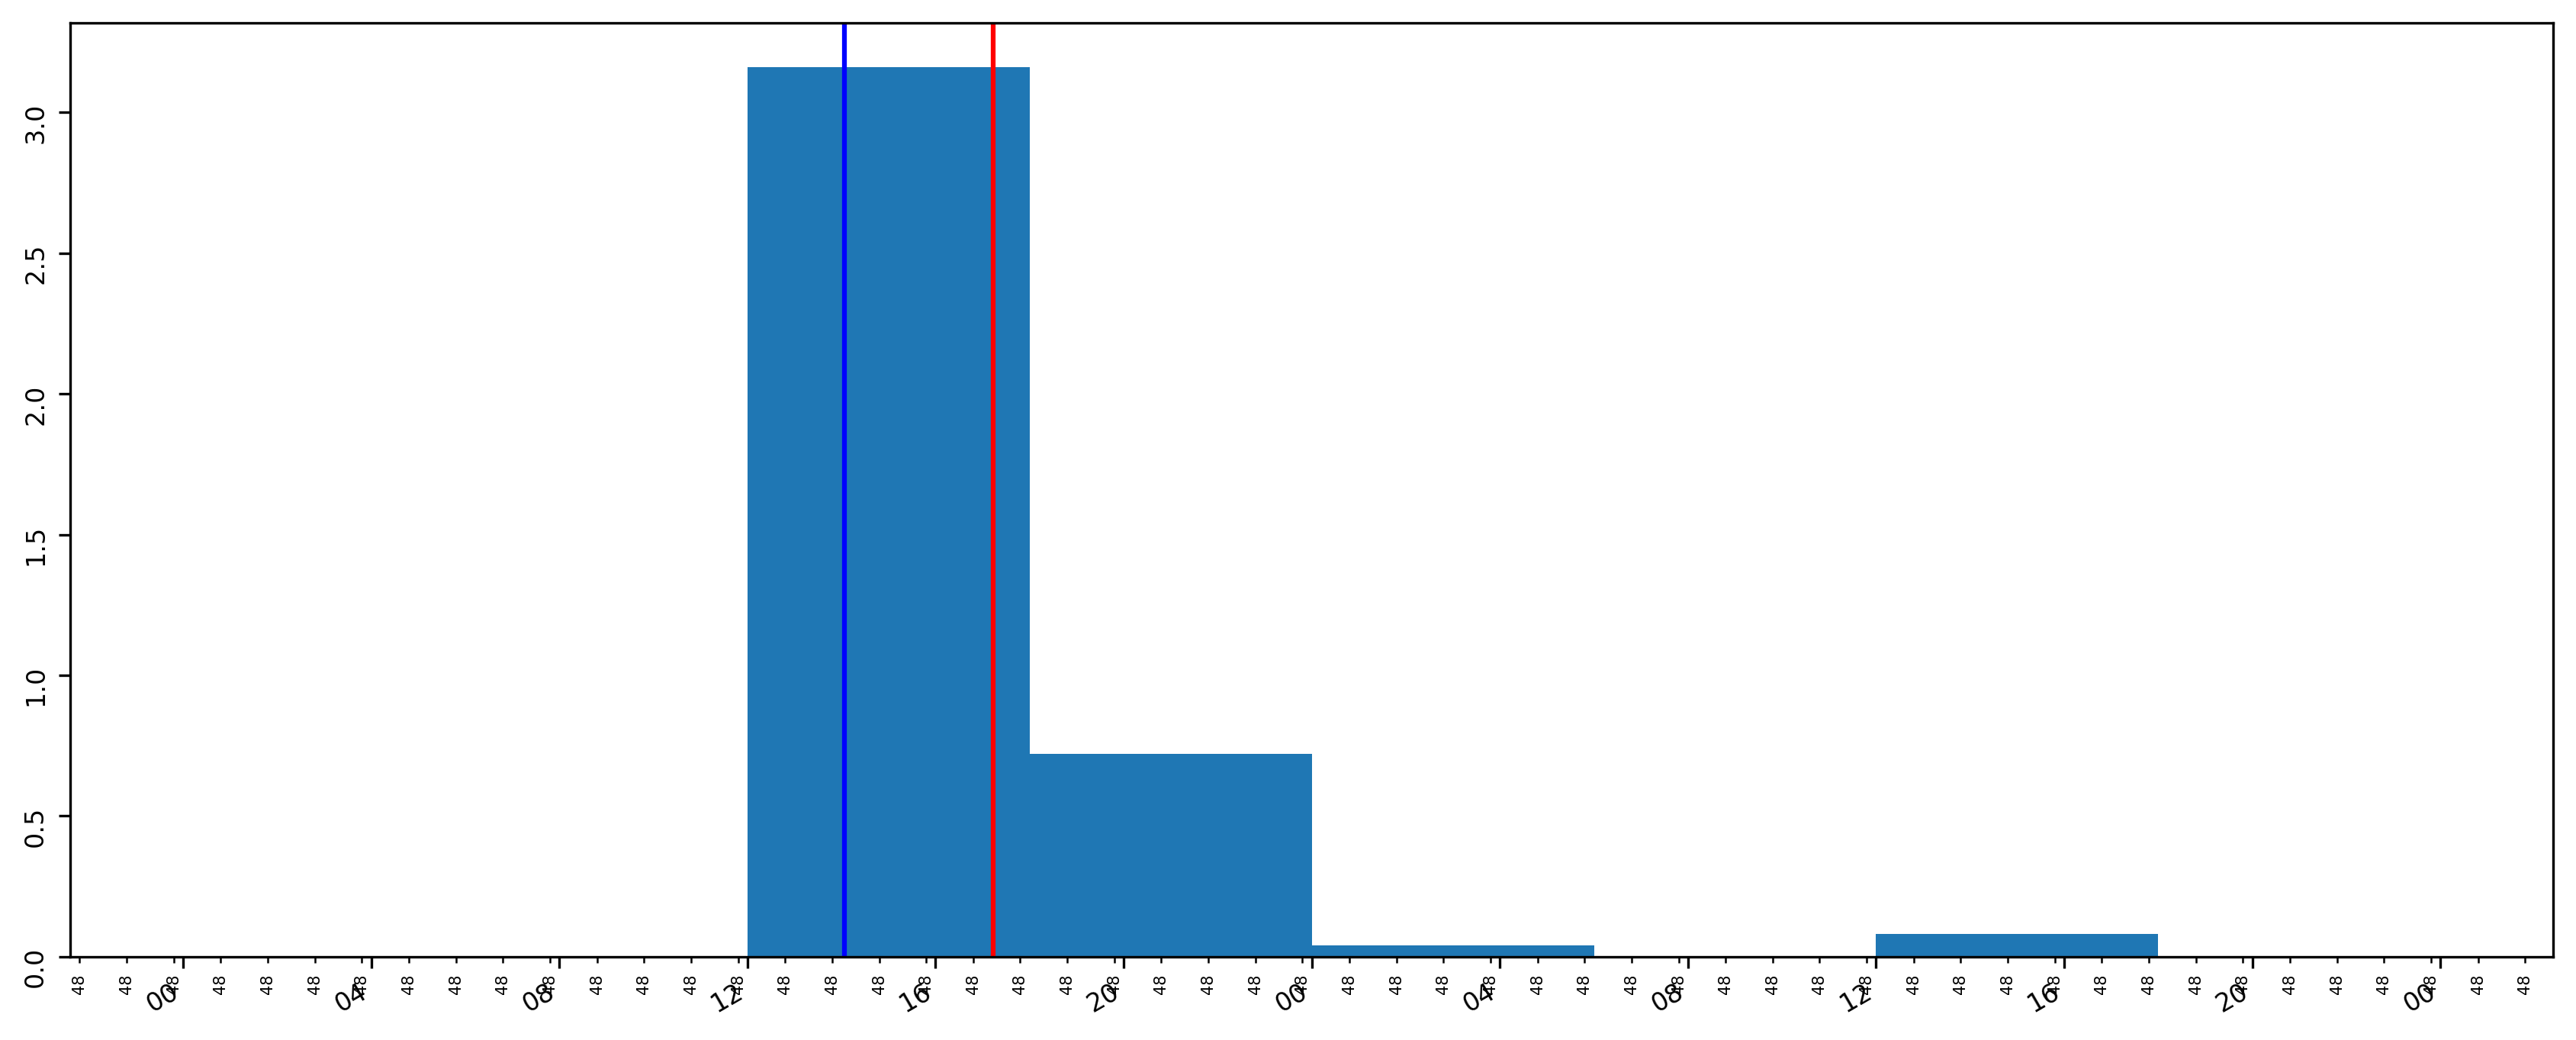

10061 [5.56287827] 0.0 2023-04-03 15:47:23.453480 2023-04-04 12:59:45.649266 21:12:22.195786
11406.561000108719
[1680539993.2478075, 1680542943.4897838, 1680533950.7754924, 1680533365.8491962, 1680548705.2283661, 1680532475.9389584, 1680548650.3712006, 1680533543.460354, 1680533493.9206698, 1680542817.2399235, 1680524686.725421, 1680533538.7562702, 1680536665.5511603, 1680533500.5887122, 1680532460.863301, 1680538969.6952345, 1680539695.6146894, 1680542858.2685168, 1680533548.2888677, 1680534611.4851062, 1680532403.9484568, 1680532035.050624, 1680548487.6156332, 1680532465.6968133, 1680536883.7965918, 1680534661.5070033, 1680532726.797786, 1680548641.1952538, 1680532822.229755, 1680533396.2665591, 1680533335.7549558, 1680533148.358708, 1680542803.528945, 1680536803.352971, 1680533335.8390856, 1680533487.3920462, 1680532721.8995352, 1680533314.1530516, 1680536916.59246, 1680532473.1667802, 1680532366.7737317, 1680532684.2721944, 1680533334.4935617, 1680535556.4137247, 1680533436.787745,

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


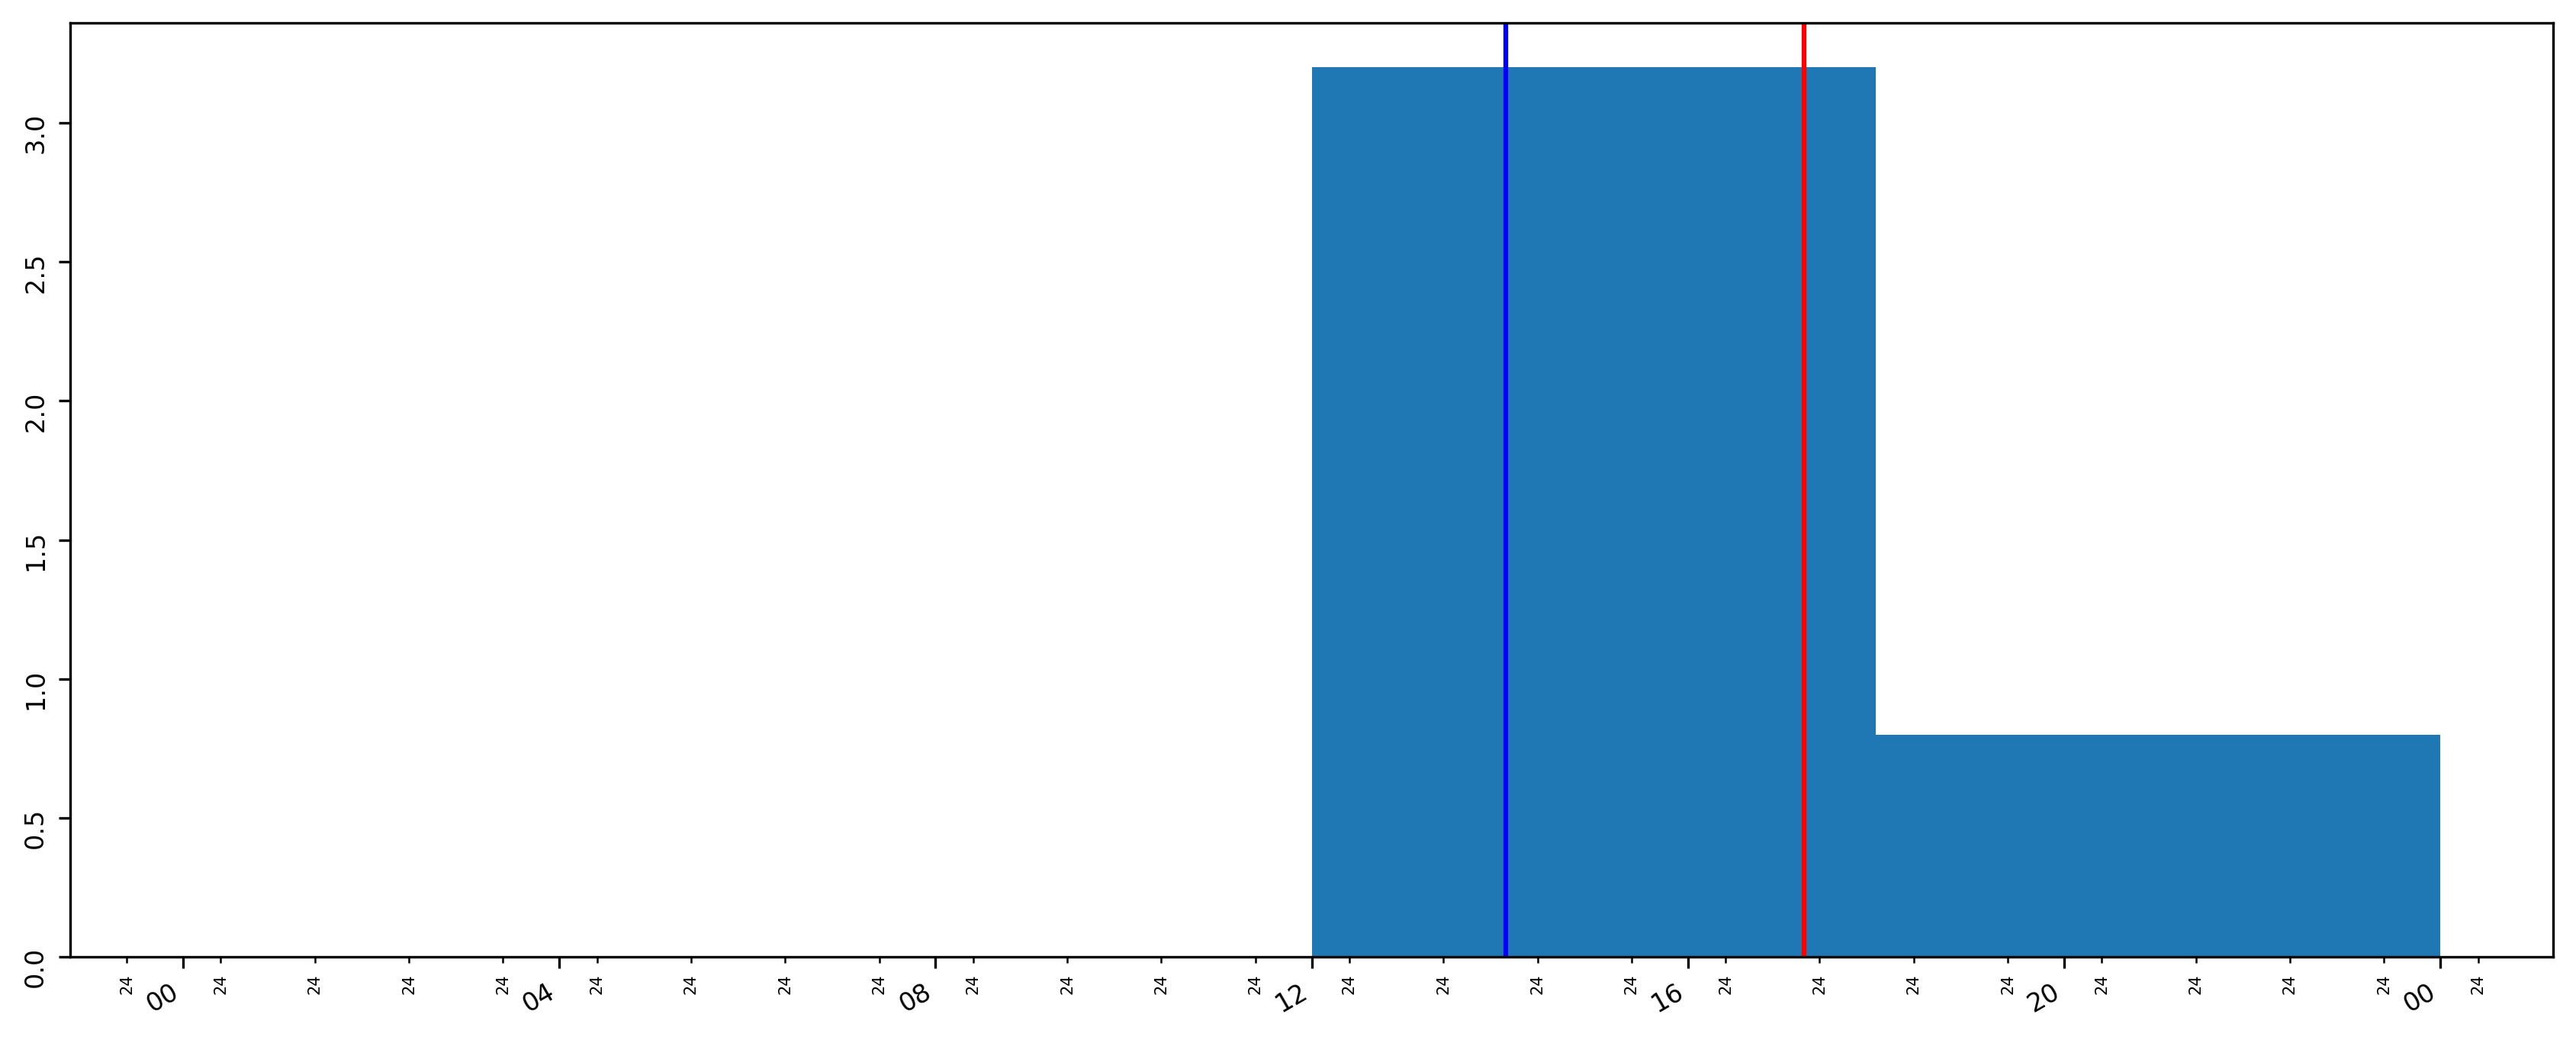

10062 [9.26057016] 0.0 2023-04-03 14:24:46.725421 2023-04-03 22:47:12.880106 8:22:26.154685
11393.305000066757
less than zero
less than zero
less than zero
less than zero
[1680536671.9555123, 1680533127.6194422, 1680538074.4415927, 1680533182.3791974, 1680535692.3961823, 1680548677.5132635, 1680532676.2635267, 1680531935.9393852, 1680533390.9776397, 1680606031.0758255, 1680532688.9648986, 1680532749.5156739, 1680539062.2225618, 1680533458.731709, 1680533385.2447414, 1680531982.729443, 1680533292.2702317, 1680536795.2223217, 1680534679.328735, 1680533400.8926396, 1680533114.118538, 1680534627.3101394, 1680533359.7148185, 1680530639.5490322, 1680533437.0116715, 1680533325.843227, 1680531940.5158994, 1680540202.2767665, 1680533330.4385657, 1680533526.870925, 1680533333.7811158, 1680533247.401929, 1680533548.5894587, 1680534583.8013744, 1680534599.5998504, 1680542860.2173645, 1680532394.2996986, 1680533611.6354766, 1680534443.437511, 1680532745.543361, 1680541387.3355772, 1680533429.386079

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


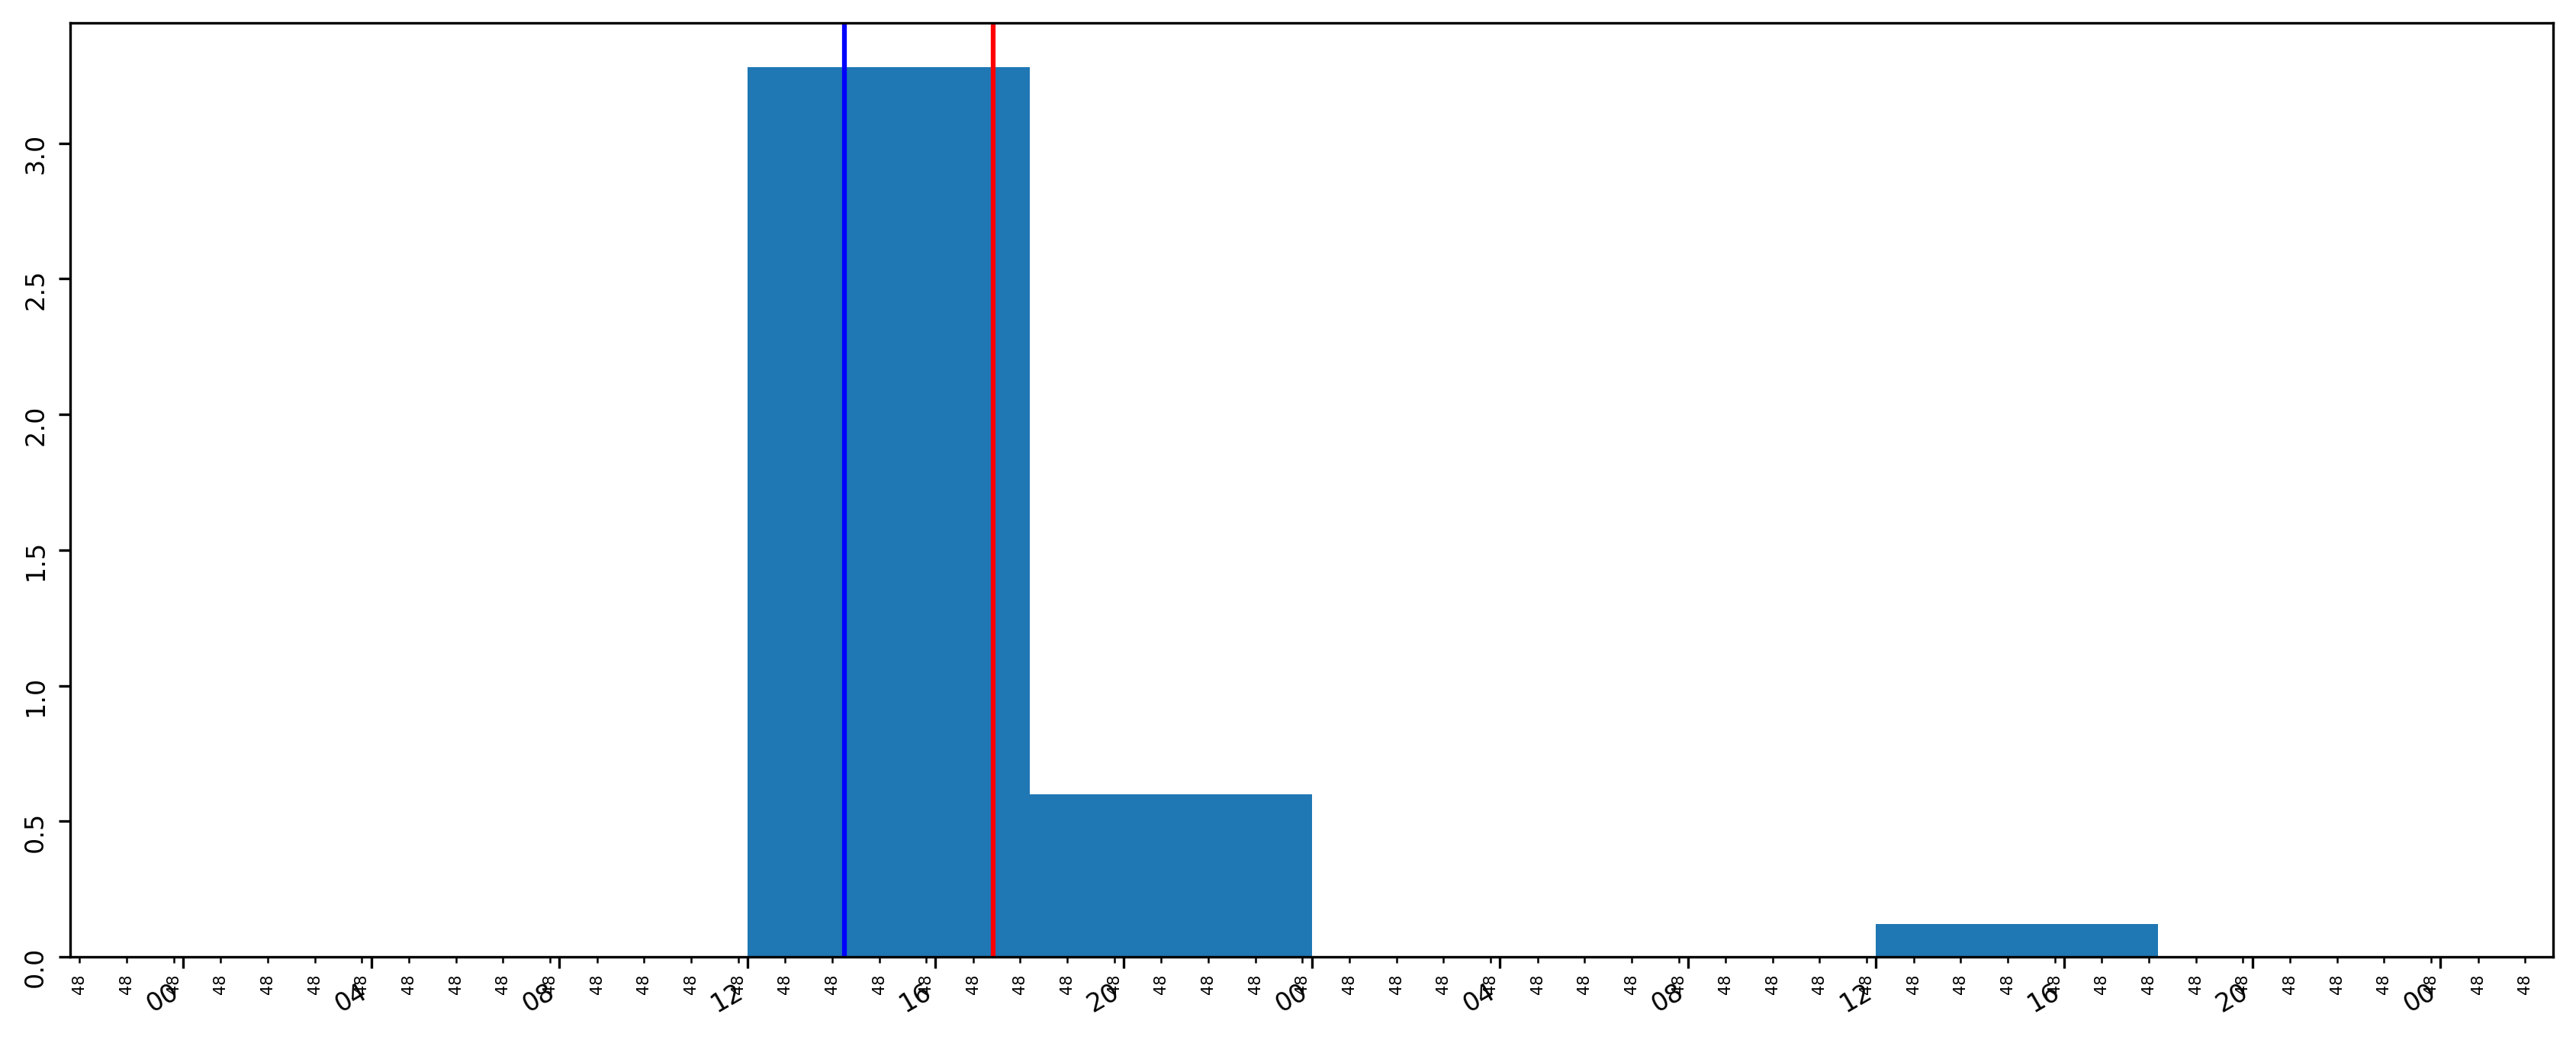

10063 [5.57973604] 0.0 2023-04-03 16:03:05.168421 2023-04-04 13:00:31.075825 20:57:25.907404
11379.308000087738
less than zero
less than zero
less than zero
less than zero
[1680536721.451555, 1680548708.7860792, 1680532668.5075445, 1680533459.3944814, 1680539948.6916783, 1680533367.8359342, 1680542854.512264, 1680533486.075512, 1680533610.479227, 1680540000.275826, 1680533479.1312802, 1680548465.8099778, 1680533306.0760698, 1680533494.6878898, 1680548771.7109203, 1680542895.32199, 1680533475.7866619, 1680533099.2668726, 1680533376.2533455, 1680532507.829533, 1680533511.8650732, 1680533384.271537, 1680533355.6229782, 1680533422.4966075, 1680549128.418659, 1680532097.642129, 1680533397.853474, 1680533540.4498515, 1680538735.3146892, 1680537050.024381, 1680533051.592309, 1680532508.791087, 1680536748.4450915, 1680532835.579076, 1680532438.6911912, 1680532492.189932, 1680533498.0476153, 1680536692.7085114, 1680534695.1013117, 1680533211.158005, 1680533548.2798755, 1680534785.2392483, 16805

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


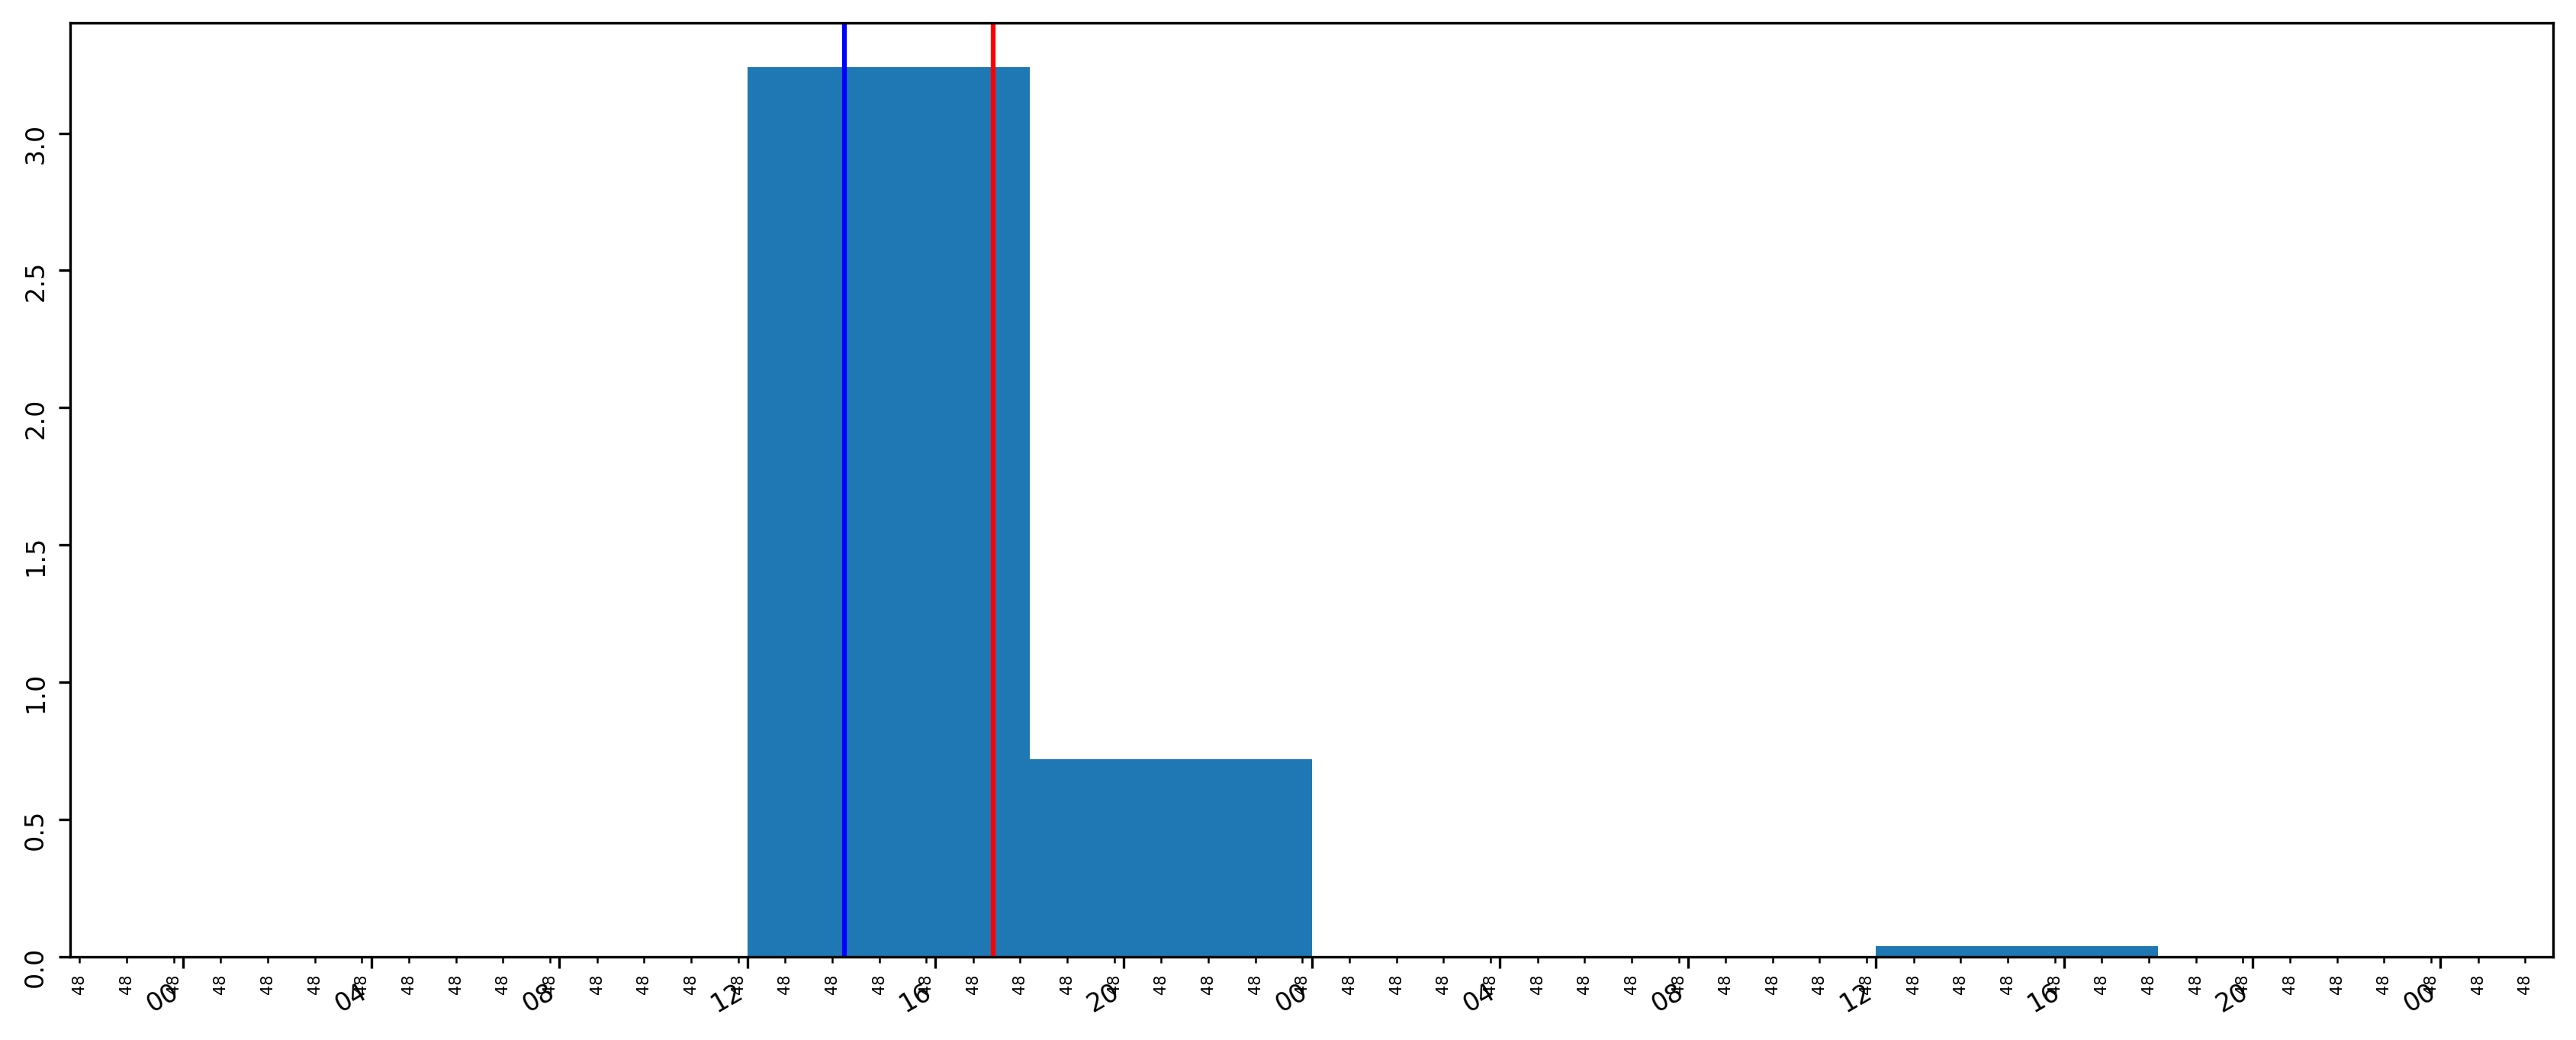

10064 [7.40448177] 0.0 2023-04-03 16:03:43.169932 2023-04-04 12:59:48.021632 20:56:04.851700
11365.565999984741
less than zero
less than zero
[1680536731.1998882, 1680533209.3166895, 1680549137.6089005, 1680538041.9027486, 1680533235.0105703, 1680548635.2033954, 1680533501.2748356, 1680533486.5117059, 1680547516.8608353, 1680533522.4787316, 1680536626.0680568, 1680533436.8887038, 1680534558.154298, 1680533392.6015742, 1680533592.303479, 1680541437.1583652, 1680532196.4832296, 1680533407.3953576, 1680533424.6112192, 1680532450.7406805, 1680535621.7990742, 1680533559.8784022, 1680533513.517452, 1680533151.2274566, 1680533416.1176345, 1680533511.0640552, 1680533142.6373107, 1680548523.1911535, 1680533432.8098907, 1680532535.2418222, 1680534626.4669657, 1680548500.7772737, 1680533483.2627819, 1680532535.870589, 1680533534.9372766, 1680533404.6986475, 1680548515.1054897, 1680533349.9552608, 1680532563.6613784, 1680533473.9169118, 1680533410.962886, 1680533401.1375532, 1680533410.7504067, 16

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


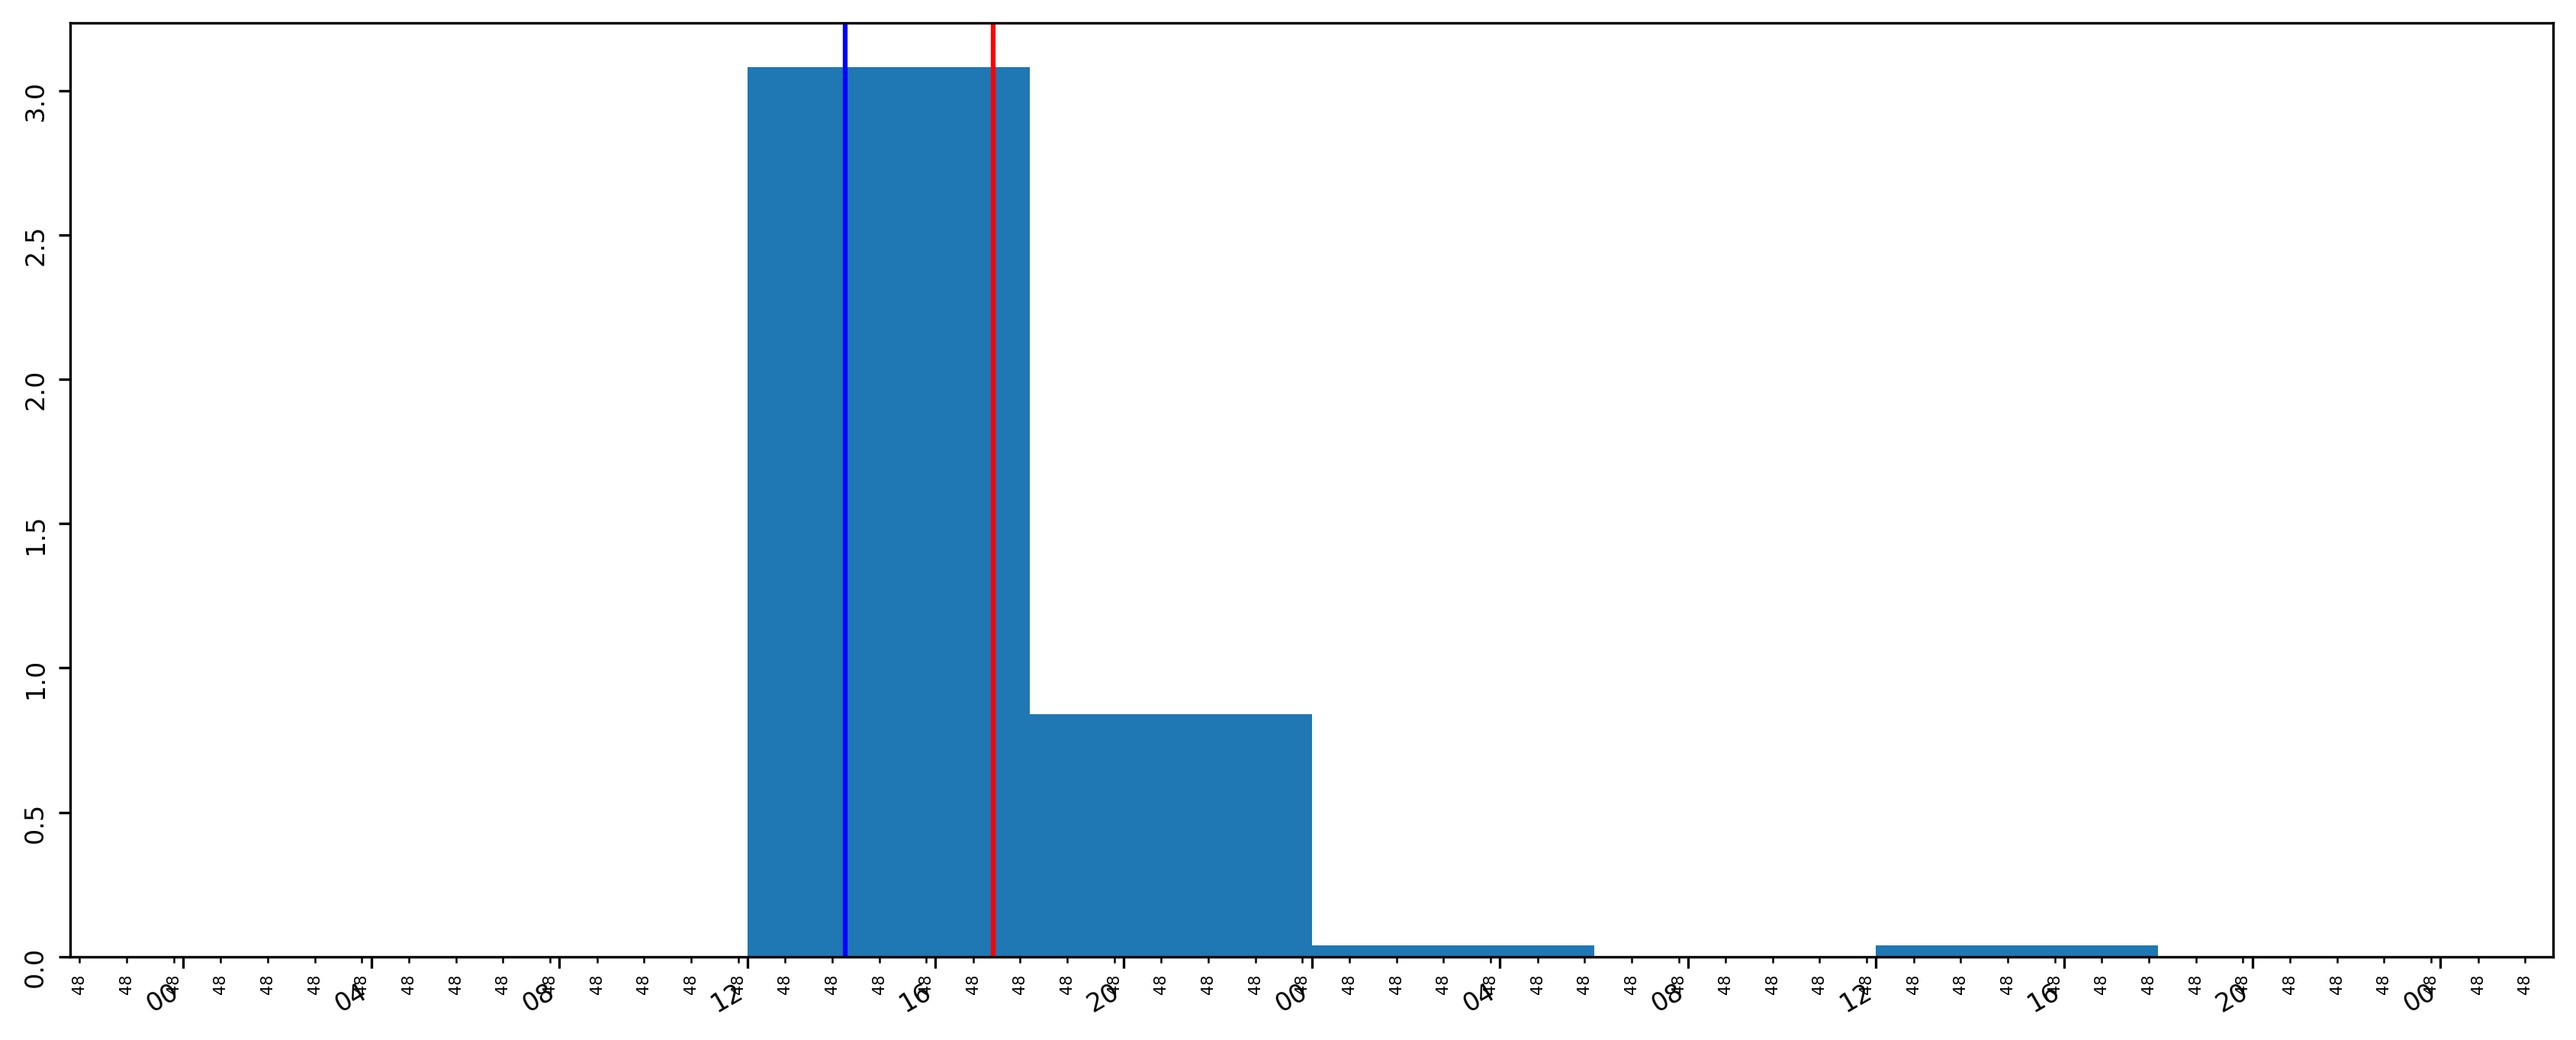

10065 [6.93266972] 0.0 2023-04-03 16:26:36.208526 2023-04-04 13:01:54.490861 20:35:18.282335
11348.30999994278
less than zero
less than zero
less than zero
less than zero
less than zero
[1680533557.6673162, 1680533437.7035646, 1680532480.1766205, 1680548835.6235936, 1680533494.6243799, 1680532619.010067, 1680532462.5762951, 1680533381.6405675, 1680532398.5184639, 1680533617.3575053, 1680533630.0456655, 1680533364.8460333, 1680536724.0849075, 1680534691.9936645, 1680533591.1355891, 1680533401.1051795, 1680536732.4701123, 1680523299.6537497, 1680540125.1273785, 1680532197.2082033, 1680532539.819483, 1680533575.3939478, 1680533526.746033, 1680536801.1018836, 1680533414.2290895, 1680533574.6216683, 1680530660.2516181, 1680533187.334653, 1680532800.3950295, 1680533275.4970622, 1680533519.940361, 1680533507.3419027, 1680533471.7108753, 1680541442.239163, 1680606037.8136878, 1680530663.3279707, 1680533633.8291662, 1680533444.9358668, 1680536959.1043587, 1680533491.7805839, 1680533583.1334472,

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


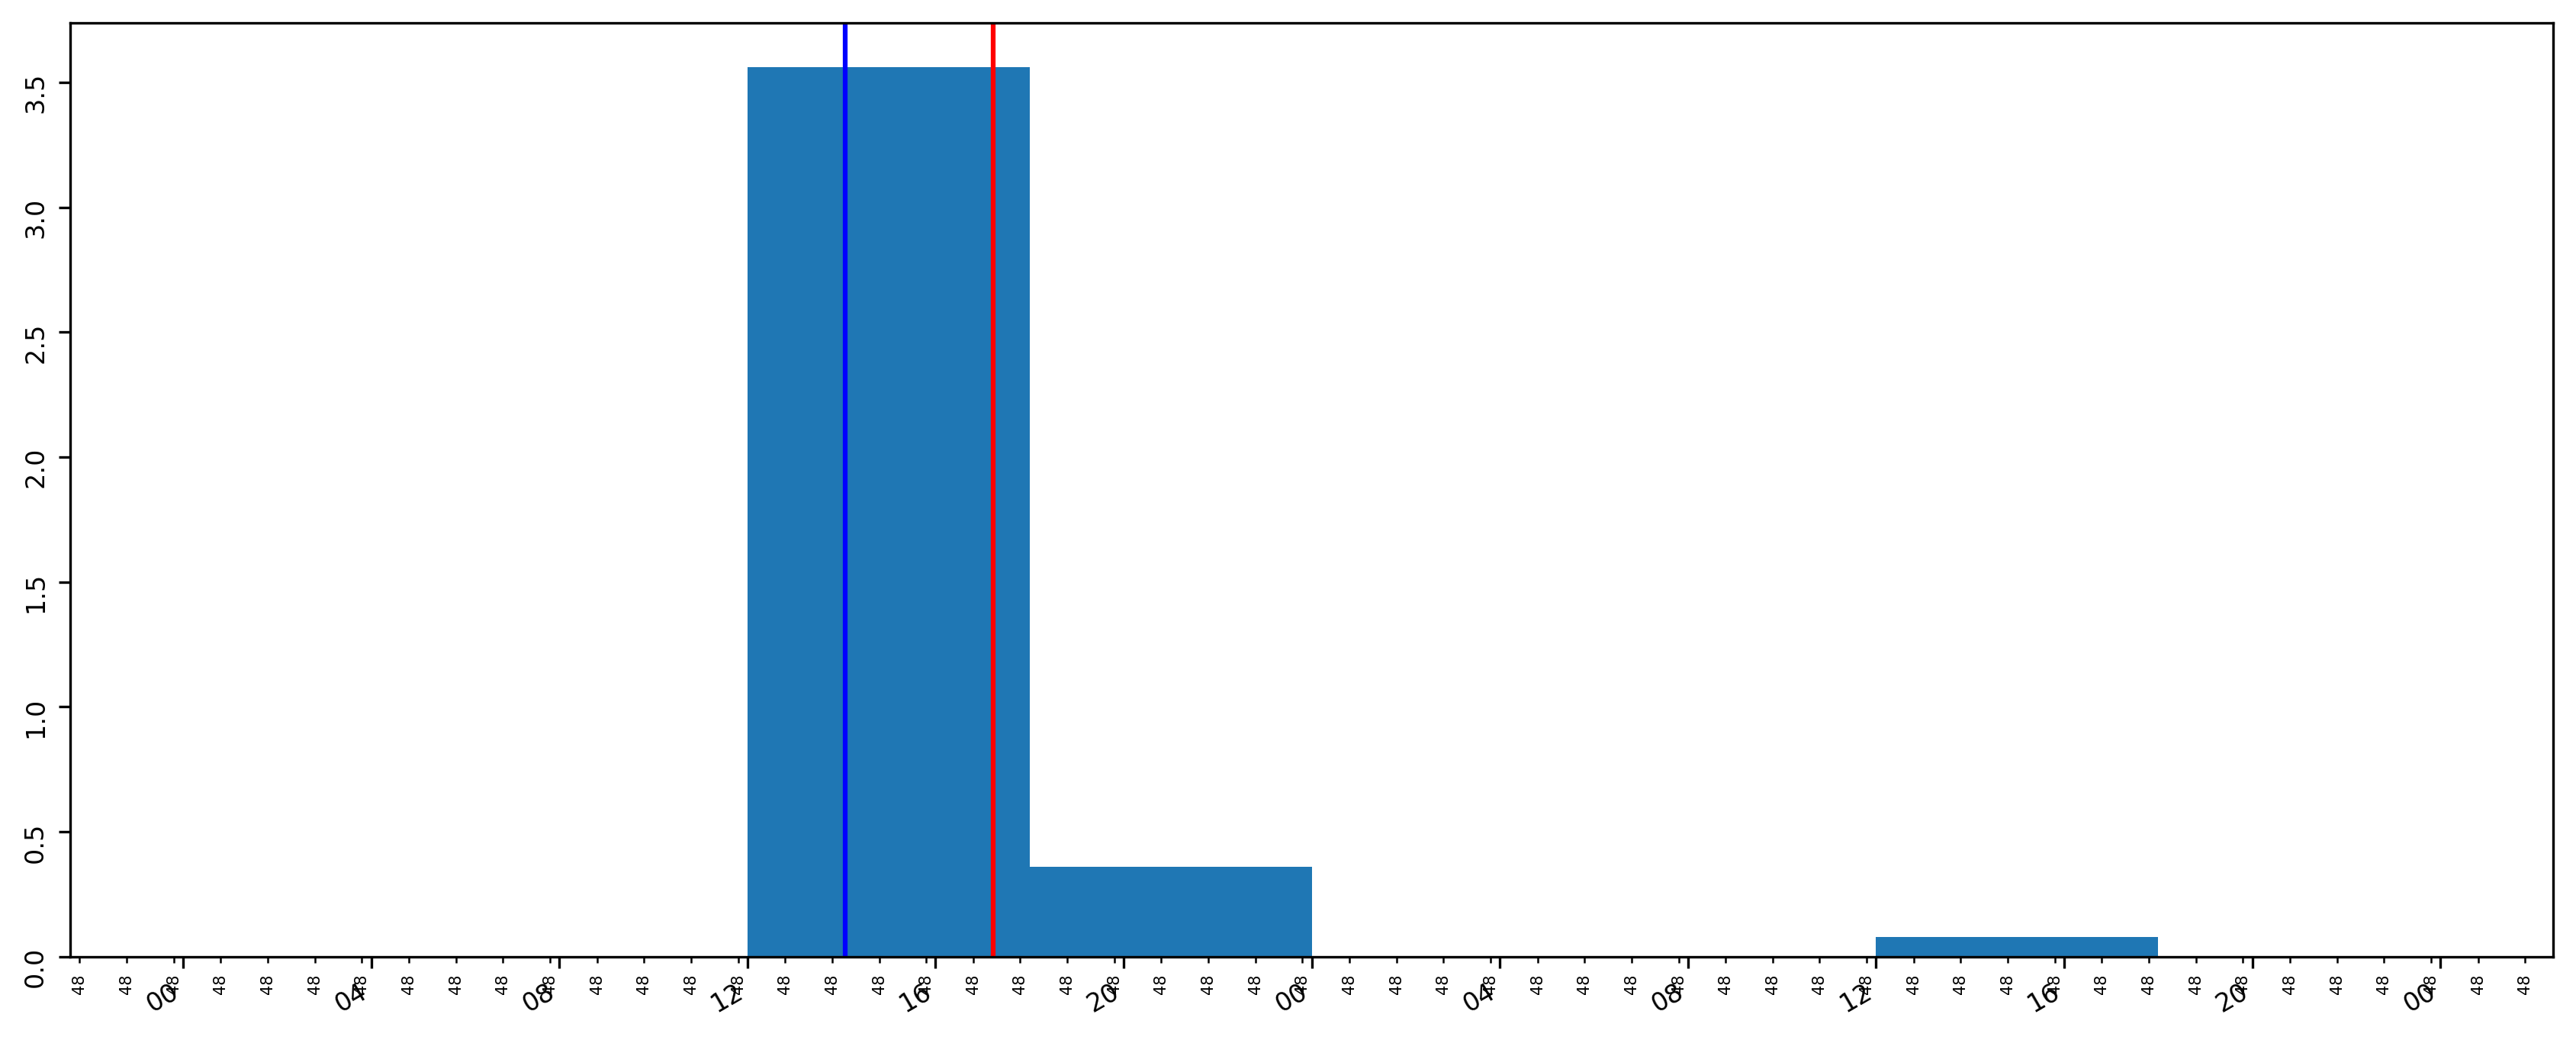

10067 [6.69748504] 0.0 2023-04-03 14:01:39.653750 2023-04-04 13:00:40.568119 22:59:00.914369
11335.625
less than zero
less than zero
less than zero
less than zero
less than zero
less than zero
less than zero
less than zero
[1680532595.0780582, 1680533484.6113229, 1680533491.357739, 1680533563.3599768, 1680539805.0701797, 1680532727.0375464, 1680533246.7096205, 1680533632.3248162, 1680533527.2612193, 1680537028.4052007, 1680533580.144355, 1680532491.6596067, 1680533578.426645, 1680540114.3480673, 1680533473.7836275, 1680533270.416637, 1680533083.6977482, 1680453261.723815, 1680533345.2215128, 1680541458.5895264, 1680533456.3111978, 1680535567.5334702, 1680536881.2274208, 1680548707.836148, 1680533484.9472811, 1680532573.1942034, 1680533517.6058404, 1680533138.827091, 1680546201.7728746, 1680533178.6752956, 1680542950.2046454, 1680548648.7299256, 1680535588.8912842, 1680533276.8905284, 1680533188.0558712, 1680533452.390705, 1680533570.0805428, 1680533491.9832175, 1680532497.6310153, 1680

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


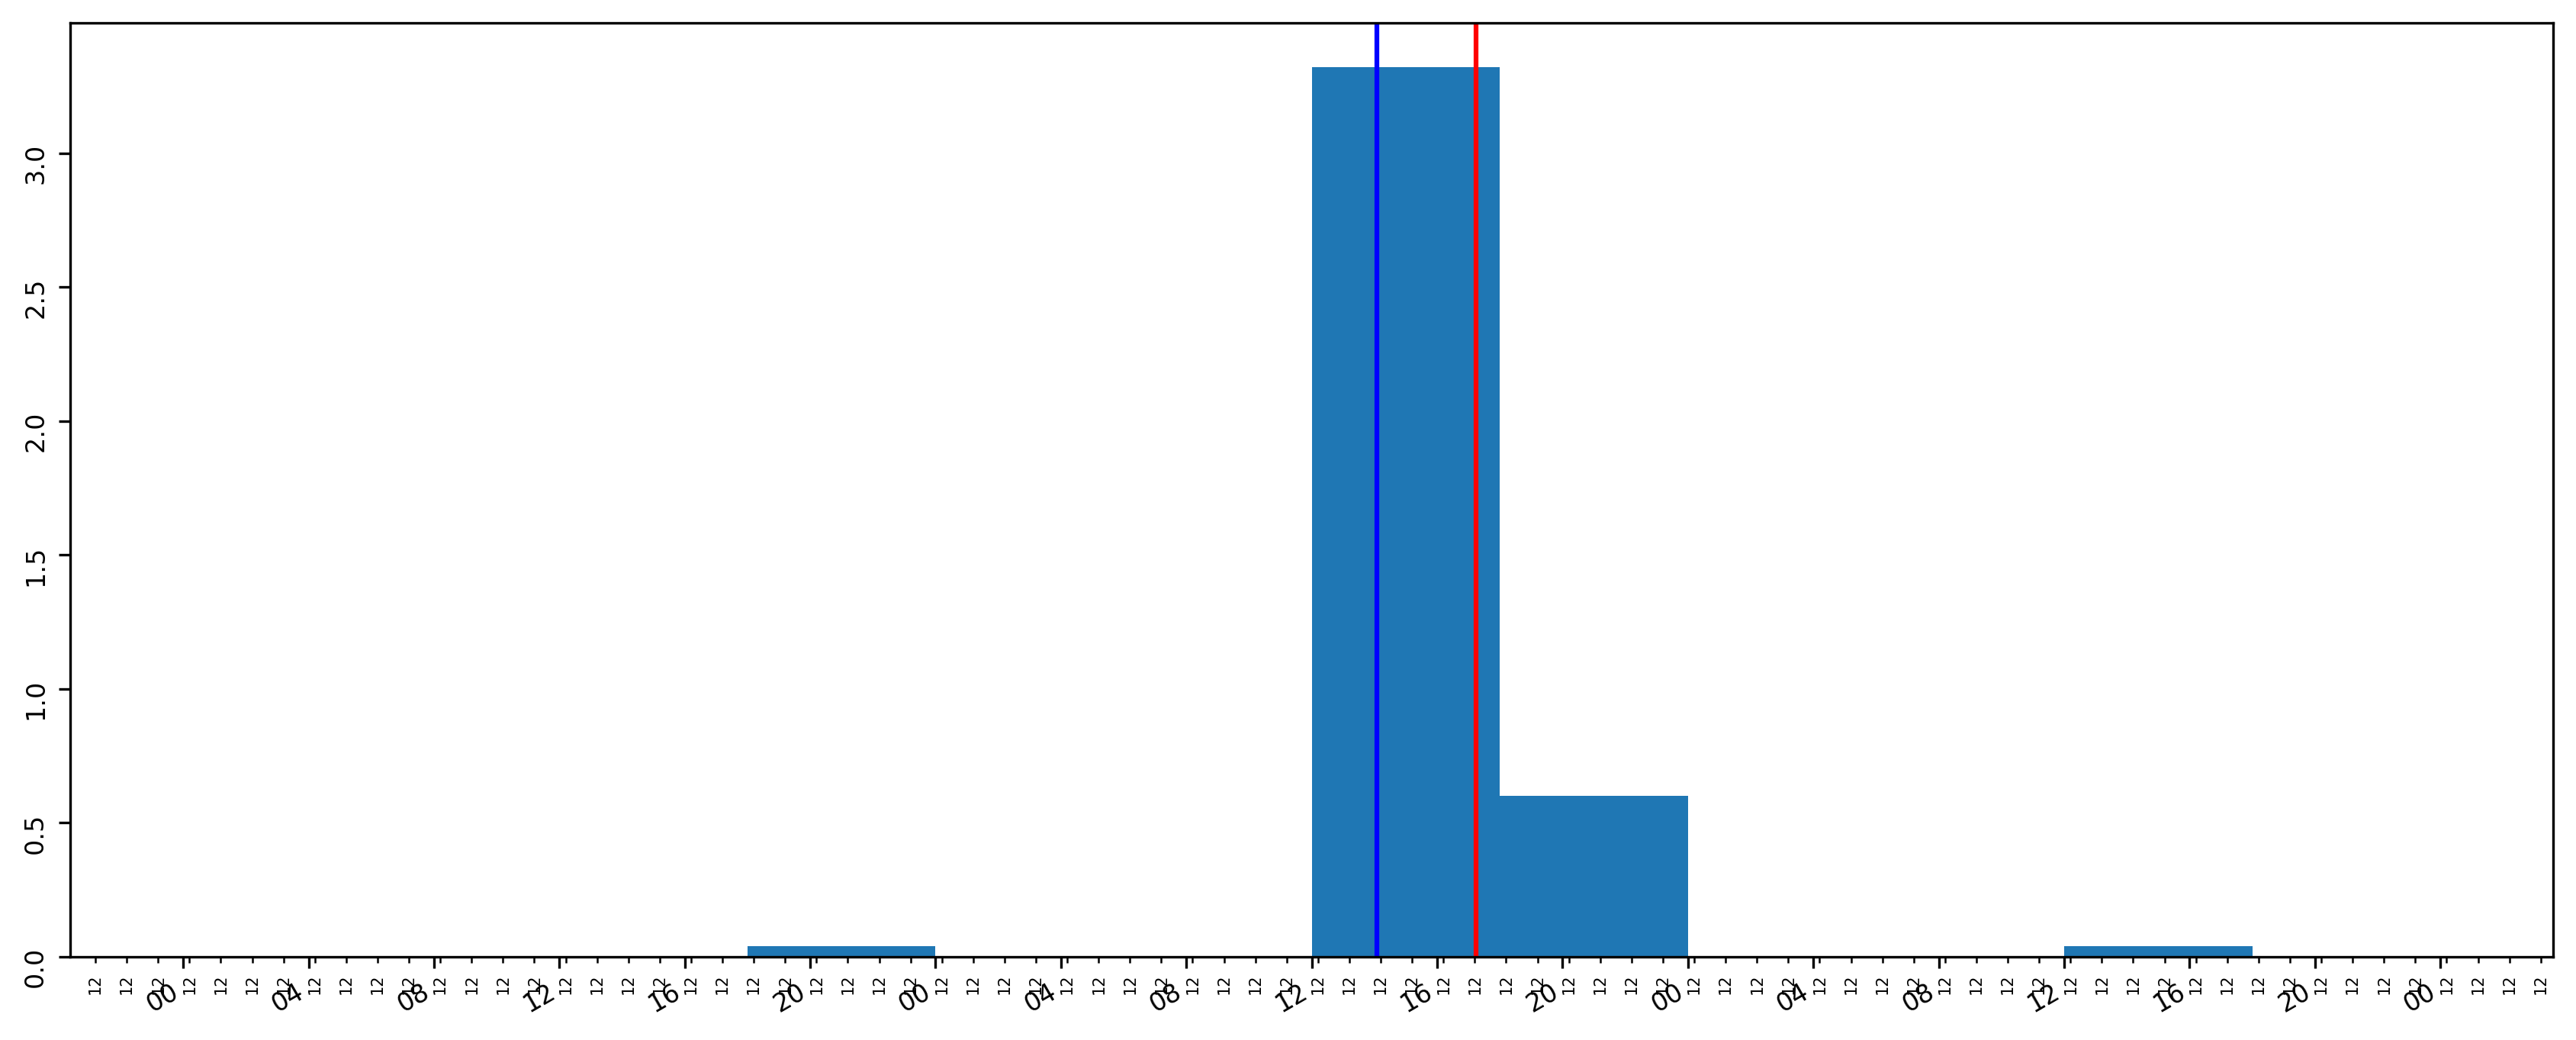

10068 [5.91422239] 0.0 2023-04-02 18:34:21.723815 2023-04-04 12:59:59.628093 1 day, 18:25:37.904278
11320.276000022888
less than zero
less than zero
less than zero
less than zero
[1680541426.646592, 1680541485.314489, 1680533468.88385, 1680533466.8934352, 1680532545.8879323, 1680533620.9917688, 1680533561.0688546, 1680533444.8964033, 1680532861.339854, 1680538878.8688204, 1680533662.114764, 1680533531.6240523, 1680533523.7447228, 1680537795.1622872, 1680549430.1527343, 1680539897.1859715, 1680536899.796563, 1680533484.7388458, 1680533532.2539806, 1680542953.5658655, 1680533536.6926484, 1680530642.1069763, 1680549336.650975, 1680532218.635065, 1680533529.084013, 1680533444.256441, 1680532539.6042855, 1680536803.3875284, 1680533603.5649717, 1680539853.2844994, 1680533503.5271, 1680535787.5035362, 1680533417.0305011, 1680537412.6670892, 1680539048.0951998, 1680533308.2601209, 1680549307.5542402, 1680560376.7970464, 1680533515.625064, 1680539863.1194572, 1680549484.6547503, 1680533603.1165

/tmp/ipykernel_279570/1009607866.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


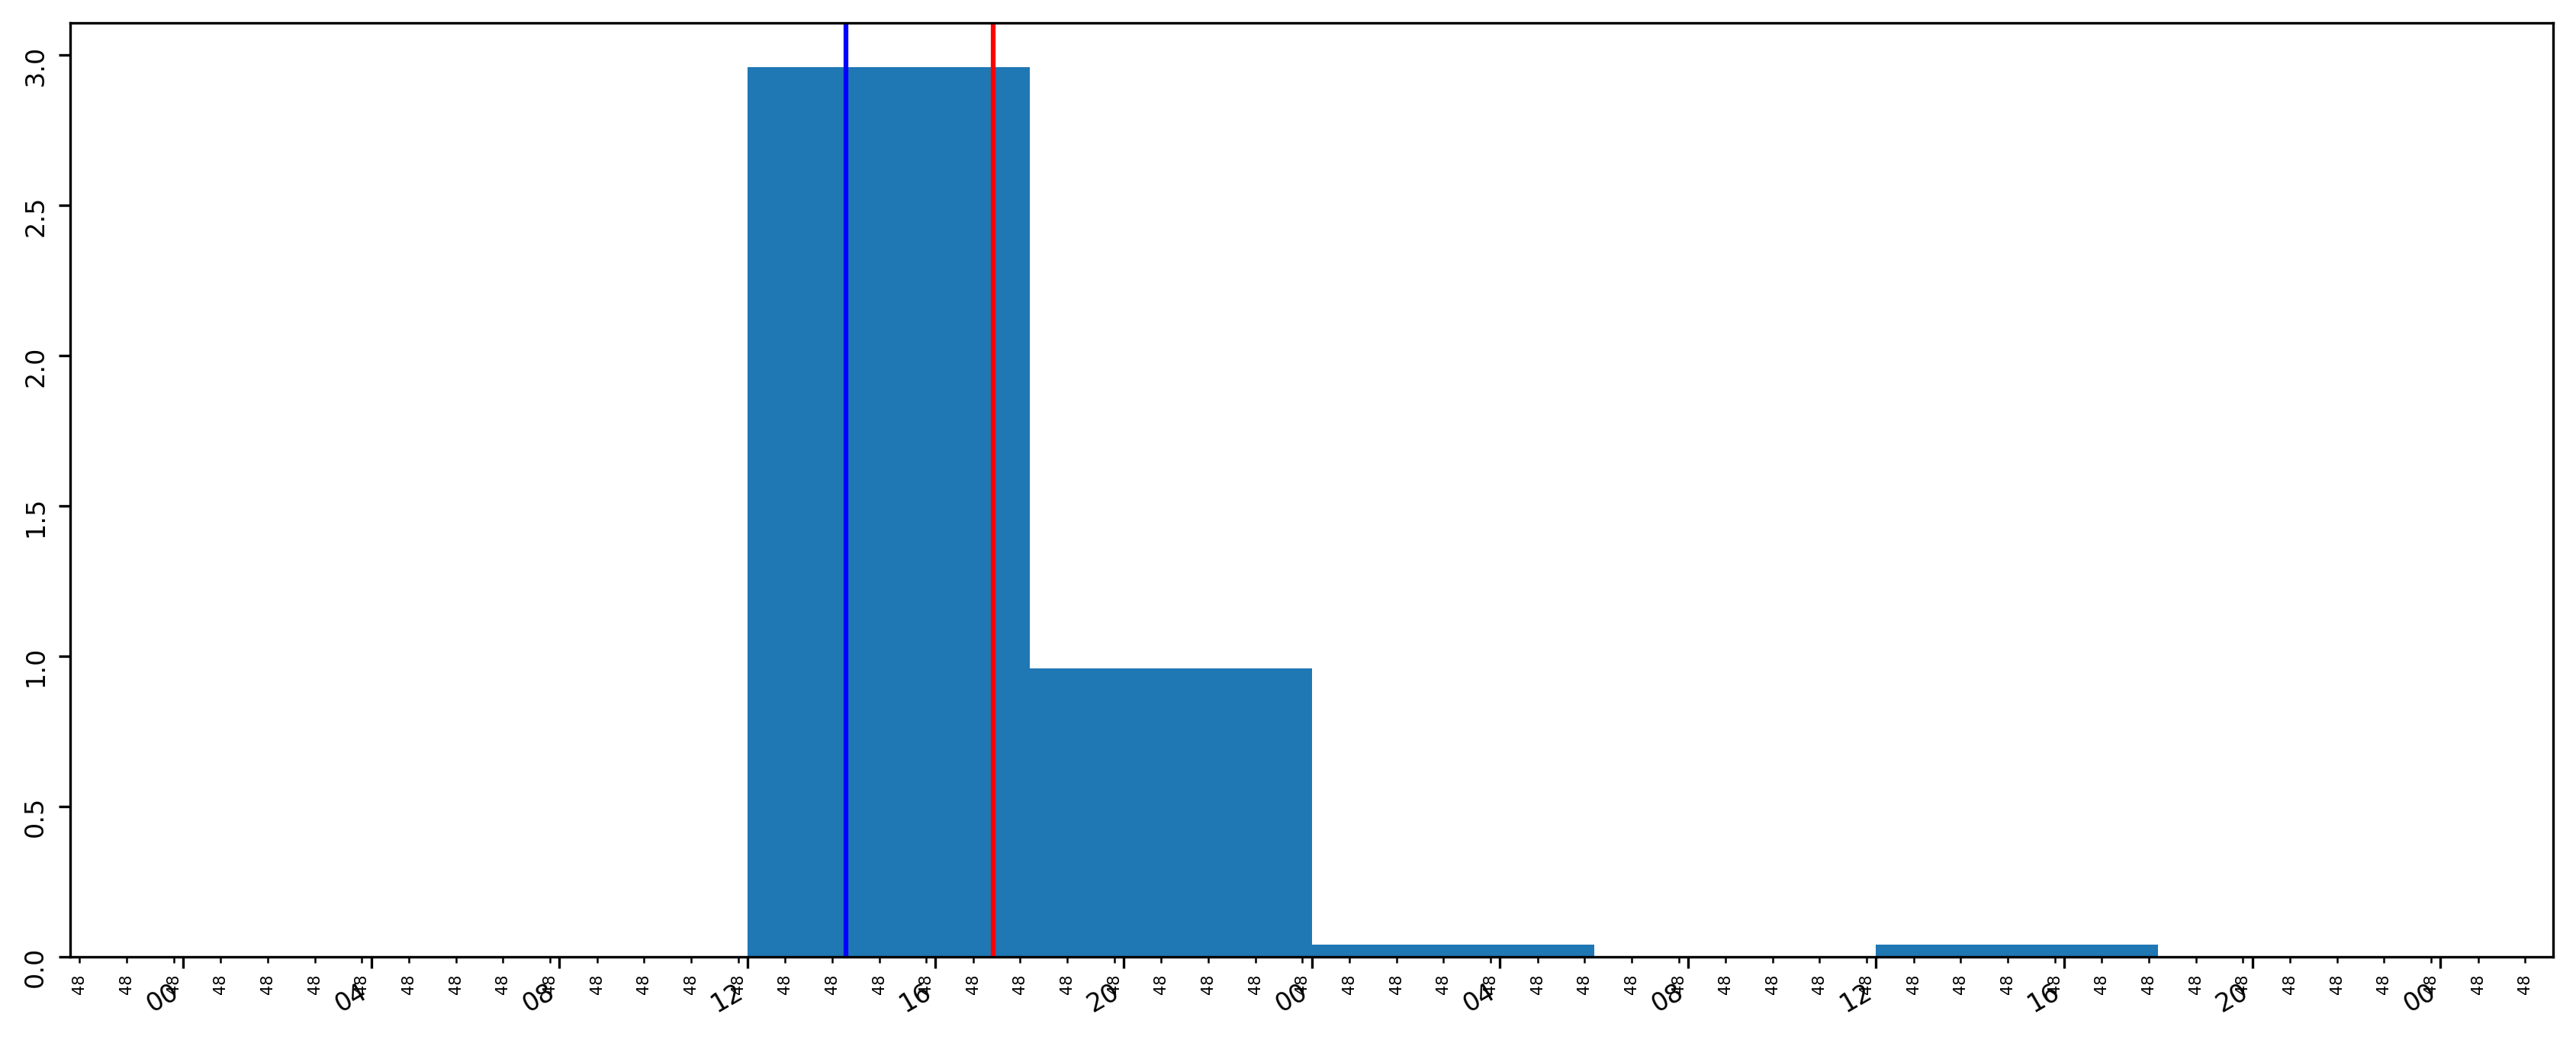

10070 [6.88281819] 0.0 2023-04-03 15:34:24.921782 2023-04-04 12:59:26.199474 21:25:01.277692
11310.006000041962
less than zero


In [ ]:
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

importlib.reload(sys.modules['PCR_evaluation.drbart_evaluation'])
importlib.reload(sys.modules['PCR_evaluation.normal_evaluation'])
from PCR_evaluation.normal_evaluation import *
from PCR_evaluation.drbart_evaluation import *

kde_likelihood = lambda samples, ground_truth : gaussian_kde(samples).pdf(ground_truth) * (3600*24)
kde_likelihood3 = lambda samples, ground_truth : np.exp(
                                                        KernelDensity(kernel='linear')\
                                                            .fit(np.expand_dims(np.array(samples), axis=1)).score([[ground_truth]])
                                                    ) * (3600*24)



get_real_end_time = lambda case_name : test_event_log[test_event_log['case:concept:name'] == case_name]['time:timestamp_complete'].max().timestamp()
get_real_start_time = lambda case_name : test_event_log[test_event_log['case:concept:name'] == case_name]['time:timestamp_complete'].min().timestamp()



results = []
n = 100
for case_name in test_event_log['case:concept:name'].unique():
    case_log = test_event_log[test_event_log['case:concept:name'] == case_name]
    real_end_time = get_real_end_time(case_name)
    real_start_time = get_real_start_time(case_name)
    print(real_end_time-real_start_time)

    case_samples = [sample_drbart.sample_case(case_name) for i in range(n)]
    print(case_samples)
    likelihood = kde_likelihood(case_samples, real_end_time)
    likelihood3 = kde_likelihood3(case_samples, real_end_time)

    
    case_samples = [datetime.datetime.fromtimestamp(ts) for ts in case_samples]
    real_end_time = datetime.datetime.fromtimestamp(real_end_time)
    real_start_time = datetime.datetime.fromtimestamp(real_start_time)

    plt.figure(figsize=(14, 6))
    #plt.xticks( rotation=25 )
    #print(case_samples)
    ax=plt.gca()
    xfmt = md.DateFormatter('%H')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(md.HourLocator(byhour=range(0, 24, 4)))
    mxfmt = md.DateFormatter('%M')
    ax.xaxis.set_minor_formatter(mxfmt)
    ax.xaxis.set_minor_locator(md.MinuteLocator(interval=60))
    ax.tick_params(axis='both', which='major', labelsize=8, rotation=90)
    ax.tick_params(axis='both', which='minor', labelsize=5, rotation=90)
    
    plt.gcf().autofmt_xdate()
    plt.gcf().set_dpi(300)
    plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),
                                                  freq='6H'), density=True)
    plt.axvline(x=real_end_time, color='red')
    plt.axvline(x=real_start_time, color='blue')
    plt.show()
    results.append(likelihood[0])
    print(case_name, likelihood, likelihood3, min(case_samples), max(case_samples),  max(case_samples)-min(case_samples))


In [ ]:
str_columns = {x for x in test_event_log.columns if "str" in str(test_event_log[x].dtype).lower() or "obj" in str(test_event_log[x].dtype).lower()}
str_columns

In [ ]:
datetime.datetime.fromtimestamp(82500.66881872919)

In [ ]:
test_event_log[test_event_log['case:concept:name'] == '10057']